1. 흡연상태에 따라 건강검진 수치 차이가 있을까?
2. 신장과 허리둘레의 크기는 체중과 상관관계가 있을까?

* 검정을 통해 확인하기

# 라이브러리 로드

In [1]:
# 분석에 사용할 pandas, 수치계산에 사용할 numpy, 시각화에 사용할 seaborn 불러오기
# %matplotib inline을 설정해 노트북 안에서 그래프 시각화(구 버전 주피터 노트북)

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# 한글 폰트 설정

In [2]:
# 구글코랩 사용시 폰트 설정 필요
# 한글폰트를 설정해주지 않으면 그래프 상에서 한글이 깨져보임
# 한글 출력 가능하게 폰트설정
# 나눔고딕 설치 (이 코드 사용 시 아래있는 폰트 로드할 경우 colab에서 오류발생 아래의 폰트 설정 꼭 주석처리!)
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

# Colab의 한글폰트 설정
plt.rc('font', family = 'NanumGothic')
# 마이너스 폰트 깨지는 문제에 대한 대처
plt.rc("axes", unicode_minus = False)

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 15 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [3]:
# 레티나 설정 시 글씨가 좀 더 선명히 보임
# 폰트의 주변이 흐릿하게 보이는 것을 방지
%config InlineBackend.figure_format = 'retina'

# 데이터 불러오기
* 건강검진정보란 국민건강보험의 직장가입자와 40세 이상의 피부양자, 세대주인 지역가입자와 40세 이상의 지역가입자의 일반건강검진 결과와 이들 일반건강검진 대상자 중에 만40세와 만66세에 도달한 이들이 받게 되는 생애전환기건강진단 수검이력이 있는 각 연도별 수진자 100만 명에 대한 기본정보(성, 연령대, 시도코드 등)와 검진내역(신장, 체중, 총콜레스테롤, 혈색소 등)으로 구성된 개방데이터입니다.
* https://www.data.go.kr/data/15007122/fileData.do

In [4]:
# 코랩에서 구글드라이브 마운트하여 데이터 불러오기
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
# 내 드라이브 내의 파일을 불러올 때 경로 /content/drive/My Drive/를 앞에 붙여주기
# encoding='utf-8'이 안될 때는 encoding='CP949' 사용.
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DATA/건강검진정보_20191231.csv', encoding='CP949')
# 파일 읽은 후 shape로 행과 열의 수 출력
df.shape

(1000000, 34)

### 데이터 미리보기

In [6]:
# sample, head, tail을 통해 데이터 미리보기
df.head()

,기준년도,가입자 일련번호,시도코드,성별코드,연령대 코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),청력(좌),청력(우),수축기 혈압,이완기 혈압,식전혈당(공복혈당),총 콜레스테롤,트리글리세라이드,HDL 콜레스테롤,LDL 콜레스테롤,혈색소,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마 지티피,흡연상태,음주여부,구강검진 수검여부,치아우식증유무,결손치 유무,치아마모증유무,제3대구치(사랑니) 이상,치석,데이터 공개일자
0,2019,1,11,1,13,165,65,90.0,1.5,1.2,1.0,1.0,112.0,70.0,93.0,NaN,NaN,NaN,NaN,15.5,1.0,1.0,18.0,32.0,47.0,2.0,NaN,1,0.0,미시행,미시행,미시행,1.0,20191231
1,2019,2,48,2,5,155,45,64.0,1.2,0.5,1.0,1.0,114.0,76.0,89.0,NaN,NaN,NaN,NaN,14.0,1.0,0.5,15.0,8.0,13.0,1.0,1.0,0,NaN,미시행,미시행,미시행,NaN,20191231
2,2019,3,41,1,13,160,70,87.0,0.9,0.8,1.0,1.0,109.0,73.0,100.0,232.0,114.0,57.0,152.0,15.6,1.0,1.0,30.0,21.0,17.0,1.0,1.0,0,NaN,미시행,미시행,미시행,NaN,20191231
3,2019,4,28,1,12,170,60,85.0,0.4,1.2,1.0,1.0,131.0,85.0,85.0,NaN,NaN,NaN,NaN,14.5,1.0,0.7,17.0,19.0,32.0,2.0,1.0,0,NaN,미시행,미시행,미시행,NaN,20191231
4,2019,5,41,1,10,170,70,81.2,0.7,0.7,1.0,1.0,112.0,66.0,91.0,NaN,NaN,NaN,NaN,14.9,1.0,0.9,19.0,24.0,19.0,2.0,NaN,0,NaN,미시행,미시행,미시행,NaN,20191231


In [7]:
df.tail()

,기준년도,가입자 일련번호,시도코드,성별코드,연령대 코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),청력(좌),청력(우),수축기 혈압,이완기 혈압,식전혈당(공복혈당),총 콜레스테롤,트리글리세라이드,HDL 콜레스테롤,LDL 콜레스테롤,혈색소,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마 지티피,흡연상태,음주여부,구강검진 수검여부,치아우식증유무,결손치 유무,치아마모증유무,제3대구치(사랑니) 이상,치석,데이터 공개일자
999995,2019,999996,41,1,12,170,65,80.0,1.0,1.2,1.0,1.0,116.0,79.0,129.0,NaN,NaN,NaN,NaN,15.7,1.0,1.3,24.0,23.0,21.0,1.0,1.0,0,NaN,미시행,미시행,미시행,NaN,20191231
999996,2019,999997,11,1,9,170,55,75.0,0.9,0.8,1.0,1.0,99.0,61.0,130.0,157.0,50.0,54.0,93.0,15.4,2.0,0.9,16.0,15.0,27.0,2.0,1.0,0,NaN,미시행,미시행,미시행,NaN,20191231
999997,2019,999998,45,1,13,160,65,92.3,1.0,0.9,1.0,1.0,116.0,70.0,102.0,NaN,NaN,NaN,NaN,15.9,1.0,1.0,23.0,28.0,84.0,2.0,1.0,1,0.0,미시행,미시행,미시행,0.0,20191231
999998,2019,999999,30,1,8,170,75,85.0,0.8,0.8,1.0,1.0,112.0,71.0,89.0,NaN,NaN,NaN,NaN,15.3,1.0,1.0,25.0,65.0,29.0,2.0,1.0,1,0.0,미시행,미시행,미시행,0.0,20191231
999999,2019,1000000,11,2,10,155,65,86.0,0.5,0.5,1.0,1.0,118.0,73.0,67.0,NaN,NaN,NaN,NaN,13.2,1.0,0.7,20.0,16.0,9.0,1.0,NaN,1,0.0,미시행,미시행,미시행,1.0,20191231


In [8]:
# 전체 데이터 중 한가지를 샘플로 출력
df.sample()

,기준년도,가입자 일련번호,시도코드,성별코드,연령대 코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),청력(좌),청력(우),수축기 혈압,이완기 혈압,식전혈당(공복혈당),총 콜레스테롤,트리글리세라이드,HDL 콜레스테롤,LDL 콜레스테롤,혈색소,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마 지티피,흡연상태,음주여부,구강검진 수검여부,치아우식증유무,결손치 유무,치아마모증유무,제3대구치(사랑니) 이상,치석,데이터 공개일자
502608,2019,502609,28,2,12,150,50,77.0,0.6,0.2,1.0,1.0,110.0,78.0,132.0,NaN,NaN,NaN,NaN,14.1,1.0,0.8,21.0,22.0,108.0,1.0,NaN,1,1.0,미시행,미시행,미시행,1.0,20191231


# 기본정보 확인

In [9]:
# info를 통해 데이터 크기, 형식, 메모리 사용량 등을 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 34 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   기준년도           1000000 non-null  int64  
 1   가입자 일련번호       1000000 non-null  int64  
 2   시도코드           1000000 non-null  int64  
 3   성별코드           1000000 non-null  int64  
 4   연령대 코드(5세단위)   1000000 non-null  int64  
 5   신장(5Cm단위)      1000000 non-null  int64  
 6   체중(5Kg 단위)     1000000 non-null  int64  
 7   허리둘레           999597 non-null   float64
 8   시력(좌)          999805 non-null   float64
 9   시력(우)          999812 non-null   float64
 10  청력(좌)          999819 non-null   float64
 11  청력(우)          999822 non-null   float64
 12  수축기 혈압         994576 non-null   float64
 13  이완기 혈압         994575 non-null   float64
 14  식전혈당(공복혈당)     994477 non-null   float64
 15  총 콜레스테롤        333549 non-null   float64
 16  트리글리세라이드       333544 non-null   float64
 17  HDL 콜레스테롤

In [10]:
# 컬럼만 따로 출력
df.columns

Index(['기준년도', '가입자 일련번호', '시도코드', '성별코드', '연령대 코드(5세단위)', '신장(5Cm단위)',
       '체중(5Kg 단위)', '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기 혈압',
       '이완기 혈압', '식전혈당(공복혈당)', '총 콜레스테롤', '트리글리세라이드', 'HDL 콜레스테롤', 'LDL 콜레스테롤',
       '혈색소', '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마 지티피', '흡연상태',
       '음주여부', '구강검진 수검여부', '치아우식증유무', '결손치 유무', '치아마모증유무', '제3대구치(사랑니) 이상',
       '치석', '데이터 공개일자'],
      dtype='object')

In [11]:
# dtypes를 통해 데이터 타입 출력
df.dtypes

기준년도               int64
가입자 일련번호           int64
시도코드               int64
성별코드               int64
연령대 코드(5세단위)       int64
신장(5Cm단위)          int64
체중(5Kg 단위)         int64
허리둘레             float64
시력(좌)            float64
시력(우)            float64
청력(좌)            float64
청력(우)            float64
수축기 혈압           float64
이완기 혈압           float64
식전혈당(공복혈당)       float64
총 콜레스테롤          float64
트리글리세라이드         float64
HDL 콜레스테롤        float64
LDL 콜레스테롤        float64
혈색소              float64
요단백              float64
혈청크레아티닌          float64
(혈청지오티)AST       float64
(혈청지오티)ALT       float64
감마 지티피           float64
흡연상태             float64
음주여부             float64
구강검진 수검여부          int64
치아우식증유무          float64
결손치 유무            object
치아마모증유무           object
제3대구치(사랑니) 이상     object
치석               float64
데이터 공개일자           int64
dtype: object

# 결측치 보기

In [12]:
# isnull을 통해 결측치를 boo1값으로 표시, sum하면 컬럼마다의 결측치 수 확인가능.
df.isnull().sum()

기준년도                  0
가입자 일련번호              0
시도코드                  0
성별코드                  0
연령대 코드(5세단위)          0
신장(5Cm단위)             0
체중(5Kg 단위)            0
허리둘레                403
시력(좌)               195
시력(우)               188
청력(좌)               181
청력(우)               178
수축기 혈압             5424
이완기 혈압             5425
식전혈당(공복혈당)         5523
총 콜레스테롤          666451
트리글리세라이드         666456
HDL 콜레스테롤        666459
LDL 콜레스테롤        672852
혈색소                5532
요단백               10306
혈청크레아티닌            5526
(혈청지오티)AST         5522
(혈청지오티)ALT         5523
감마 지티피             5530
흡연상태                166
음주여부             355082
구강검진 수검여부             0
치아우식증유무          602320
결손치 유무                0
치아마모증유무               0
제3대구치(사랑니) 이상         0
치석               602320
데이터 공개일자              0
dtype: int64

In [13]:
# isna로도 결측치 여부 확인가능. sum을 통해 결측치 수 집계 가능.
df.isna().sum()

기준년도                  0
가입자 일련번호              0
시도코드                  0
성별코드                  0
연령대 코드(5세단위)          0
신장(5Cm단위)             0
체중(5Kg 단위)            0
허리둘레                403
시력(좌)               195
시력(우)               188
청력(좌)               181
청력(우)               178
수축기 혈압             5424
이완기 혈압             5425
식전혈당(공복혈당)         5523
총 콜레스테롤          666451
트리글리세라이드         666456
HDL 콜레스테롤        666459
LDL 콜레스테롤        672852
혈색소                5532
요단백               10306
혈청크레아티닌            5526
(혈청지오티)AST         5522
(혈청지오티)ALT         5523
감마 지티피             5530
흡연상태                166
음주여부             355082
구강검진 수검여부             0
치아우식증유무          602320
결손치 유무                0
치아마모증유무               0
제3대구치(사랑니) 이상         0
치석               602320
데이터 공개일자              0
dtype: int64

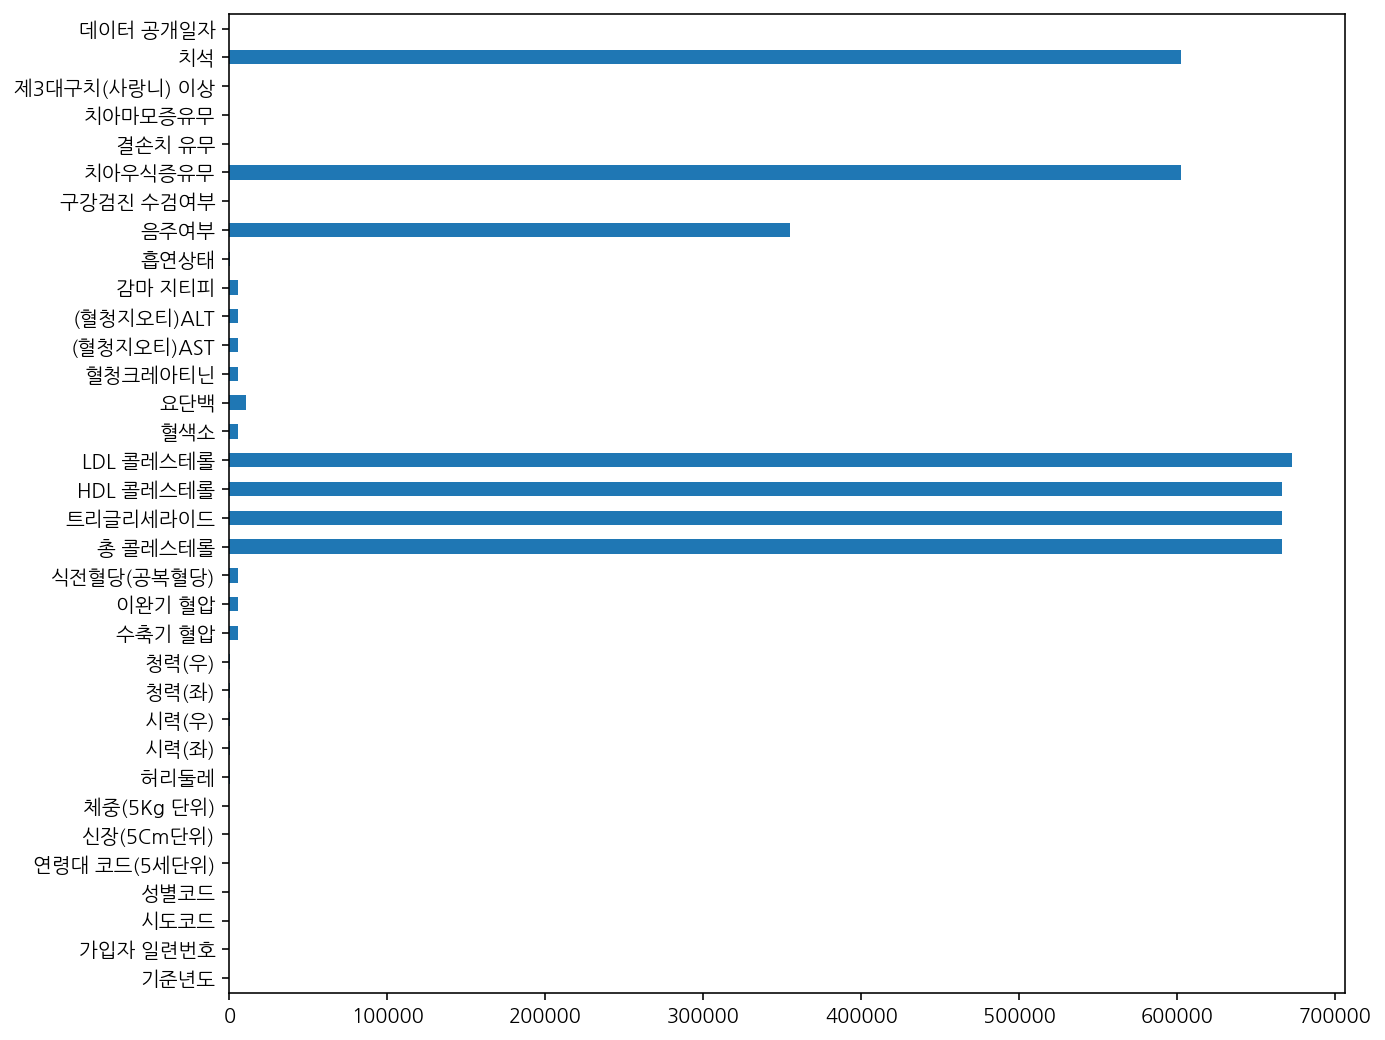

In [17]:
# 판다스에 내장 된 plot을 통해 시각화.
df.isnull().sum().plot.barh(figsize = (10,9))

# 일부 데이터 요약

In [20]:
# 여러 컬럼 가져오기
# "(혈청지오티)ALT", "(혈청지오티)AST"를 가져와 미리보기
df[["(혈청지오티)ALT","(혈청지오티)AST"]].head()

,(혈청지오티)ALT,(혈청지오티)AST
0,32.0,18.0
1,8.0,15.0
2,21.0,30.0
3,19.0,17.0
4,24.0,19.0


In [22]:
# "(혈청지오티)ALT", "(혈청지오티)AST"를 요약
df[["(혈청지오티)ALT","(혈청지오티)AST"]].describe()

,(혈청지오티)ALT,(혈청지오티)AST
count,994477.000000,994478.000000
mean,25.996708,26.231107
std,27.710895,24.046478
min,1.000000,1.000000
25%,15.000000,19.000000
50%,20.000000,23.000000
75%,30.000000,29.000000
max,6435.000000,7362.000000


# value_count로 집계

In [23]:
# value_counts를 통해 성별코드로 그룹화하고 갯수 집계 (남성: 1 / 여성: 2)
df["성별코드"].value_counts()

1    519574
2    480426
Name: 성별코드, dtype: int64

In [24]:
# value_counts를 통해 흡연상태로 그룹화하고 갯수 집계 (비흡연자: 1 / 흡연자: 2)
df["흡연상태"].value_counts()

1.0    630226
2.0    369608
Name: 흡연상태, dtype: int64

# groupby와 pivot_table 사용

### groupby

In [27]:
# groupby를 통해 데이터 그룹화
# 성별코드로 그룹화한 데이터 집계
df.groupby(["성별코드"])["가입자 일련번호"].count()

성별코드
1    519574
2    480426
Name: 가입자 일련번호, dtype: int64

In [28]:
# 성별코드와 음주여부로 그룹화 후 집계
df.groupby(["성별코드","음주여부"])["가입자 일련번호"].count()

성별코드  음주여부
1     0.0          7
      1.0     401249
2     0.0         11
      1.0     243651
Name: 가입자 일련번호, dtype: int64

In [40]:
# 성별코드와 흡연상태로 그룹화 후 감마 지티피의 평균 출력
df.groupby(["성별코드","흡연상태"])["감마 지티피"].mean()

성별코드  흡연상태
1     1.0     39.628721
      2.0     52.872470
2     1.0     22.726347
      2.0     31.512391
Name: 감마 지티피, dtype: float64

In [39]:
# 성별코드와 흡연상태로 그룹화 후 감마 지티피의 요약수치 출력
df.groupby(["성별코드","흡연상태"])["감마 지티피"].describe()

count       mean        std  min   25%   50%   75%    max
성별코드 흡연상태                                                              
1    1.0   179458.0  39.628721  46.505530  1.0  19.0  27.0  43.0  999.0
     2.0   338133.0  52.872470  63.610770  1.0  23.0  35.0  59.0  999.0
2    1.0   446653.0  22.726347  26.590937  1.0  13.0  17.0  24.0  999.0
     2.0    30061.0  31.512391  51.031108  1.0  14.0  20.0  31.0  999.0

In [38]:
# agg 사용 시 여러 수치 함께 출력 가능
df.groupby(["성별코드","흡연상태"])["감마 지티피"].agg(
    ["count","mean","median"]
)

count       mean  median
성별코드 흡연상태                           
1    1.0   179458  39.628721    27.0
     2.0   338133  52.872470    35.0
2    1.0   446653  22.726347    17.0
     2.0    30061  31.512391    20.0

### pivot_table
* https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot_table.html

In [37]:
# 흡연상태에 따른 그룹화된 수를 피봇테이블로 출력
df.pivot_table(index = "흡연상태", values="가입자 일련번호", aggfunc = "count")

,가입자 일련번호
흡연상태,
1.0,630226
2.0,369608


In [41]:
# 흡연상태에 따른 감마 지티피 평균 출력
pd.pivot_table(df, index = "흡연상태", values = "감마 지티피")

,감마 지티피
흡연상태,
1.0,27.570961
2.0,51.128538


In [46]:
# 기본값은 평균을 구하지만 aggfunc을 통해 지정도 가능
pd.pivot_table(df, index = "흡연상태", values = "감마 지티피", aggfunc = "mean")

,감마 지티피
흡연상태,
1.0,27.570961
2.0,51.128538


In [44]:
# aggfunc에 여러 값을 한번에 지정도 가능
pd.pivot_table(df, index = "흡연상태", values = "감마 지티피",
               aggfunc = ["mean", "median"])

,mean,median
,감마 지티피,감마 지티피
흡연상태,,
1.0,27.570961,19.0
2.0,51.128538,33.0


In [45]:
# aggfunc에 describe를 사용해 통계요약값을 한번에 출력도 가능
pd.pivot_table(df, index = "흡연상태", values = "감마 지티피", aggfunc = "describe")

,25%,50%,75%,count,max,mean,min,std
흡연상태,,,,,,,,
1.0,14.0,19.0,29.0,626111.0,999.0,27.570961,1.0,34.390756
2.0,22.0,33.0,56.0,368194.0,999.0,51.128538,1.0,62.950679


In [47]:
# 성별코드, 흡연상태에 따른 감마 지티피의 값 출력
pd.pivot_table(df, index = ["성별코드","흡연상태"], values = "감마 지티피", aggfunc = "describe")

25%   50%   75%     count    max       mean  min        std
성별코드 흡연상태                                                              
1    1.0   19.0  27.0  43.0  179458.0  999.0  39.628721  1.0  46.505530
     2.0   23.0  35.0  59.0  338133.0  999.0  52.872470  1.0  63.610770
2    1.0   13.0  17.0  24.0  446653.0  999.0  22.726347  1.0  26.590937
     2.0   14.0  20.0  31.0   30061.0  999.0  31.512391  1.0  51.031108

# 전체 데이터 시각화
* 100만개가 넘는 데이터 시각화 시 되도록 groupby 혹은 pivot_table로 연산하고 시각화 권장.
* 100만개가 넘는 데이터를 seaborn과 같은 고급 통계연산하는 그래프 사용 시 많이 느릴 수 있음

### 히스토그램
* 판다스의 info기능을 통해 대부분 수치 데이터로 이뤄진 것을 확인할 수 있었음
* 히스토그램 사용 시 수치데이터를 bin의 갯수만큼 그룹화하여 도수분포표를 만들고 그 결과를 시각화
* 이 데이터에는 수치데이터가 많기 때문에 판다스의 hist를 사용해 히스토그램을 그림.

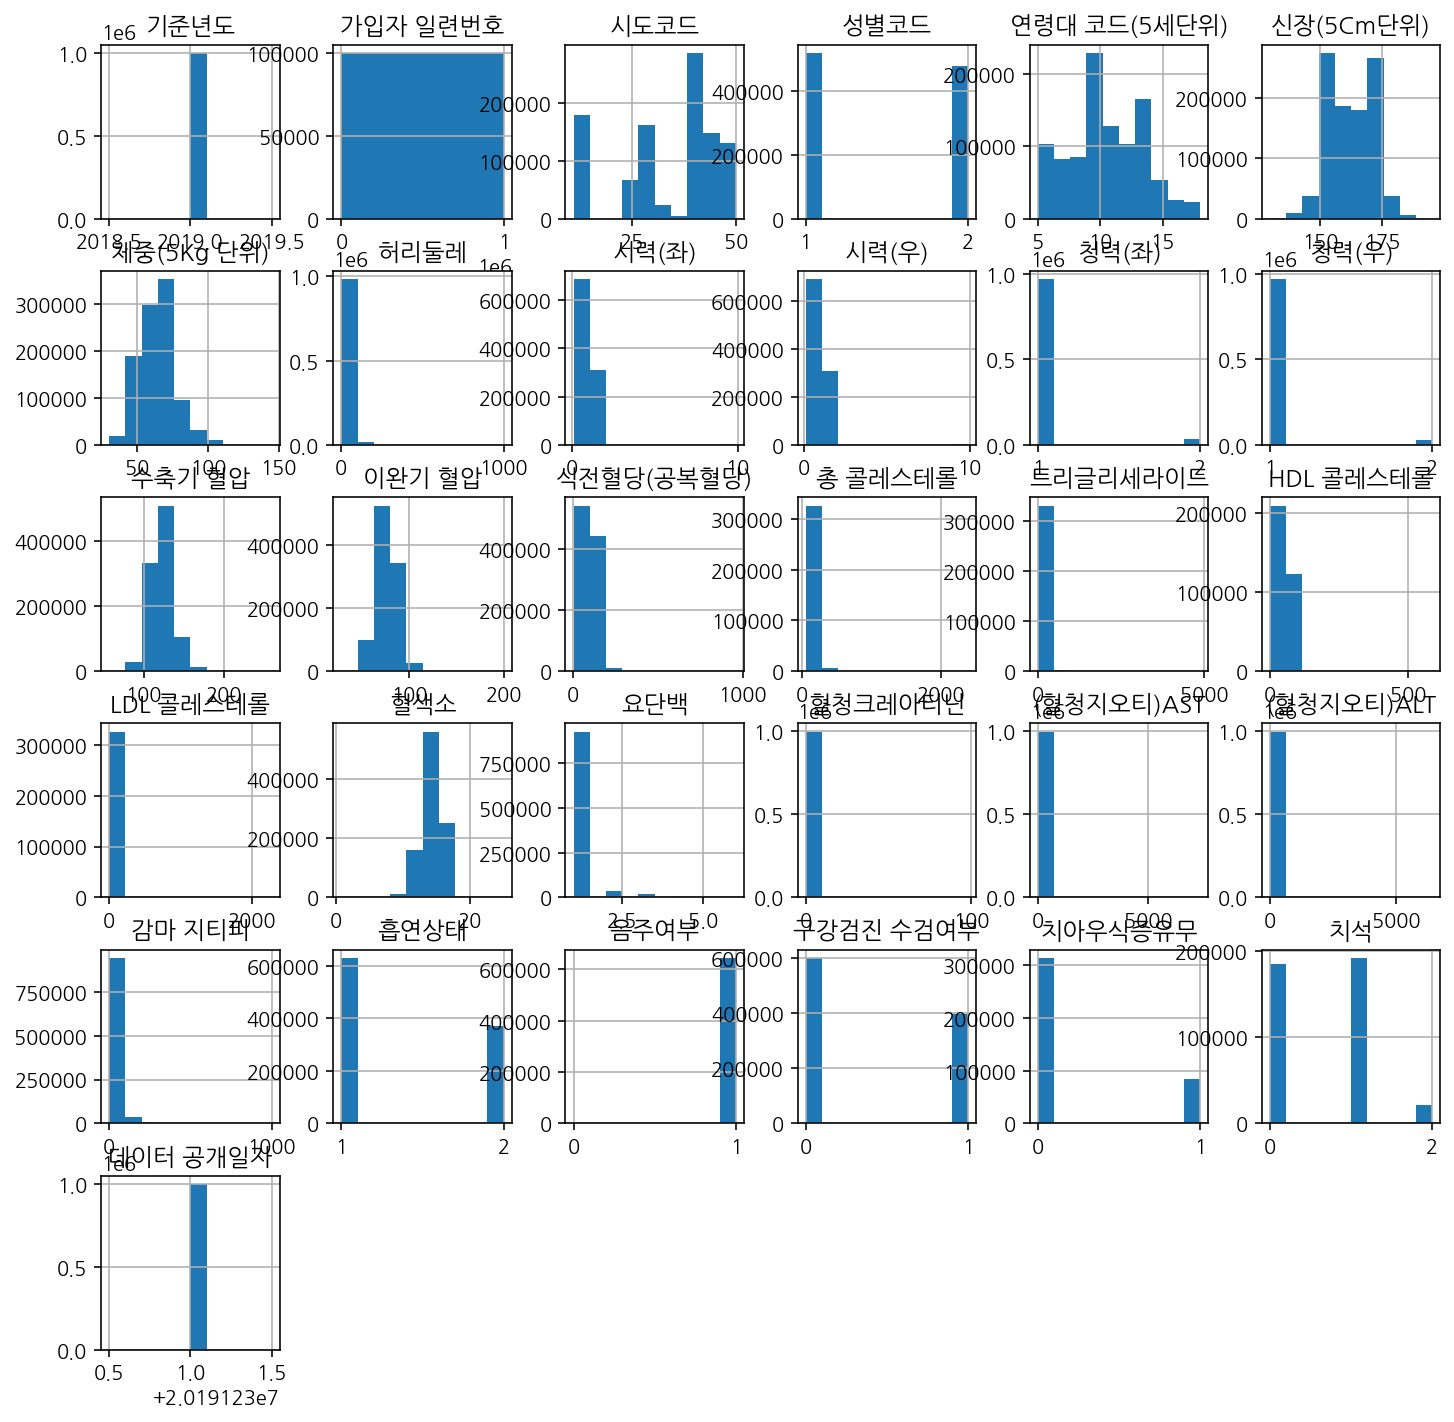

In [48]:
# 전체 데이터에 대한 히스토그램 출력
h = df.hist(figsize = (12,12))

### 슬라이싱을 사용해 히스토그램 그리기
* 슬라이싱 기능을 사용해 데이터를 나눠 그림
* 슬라이싱 사용 시 iloc를 활용하면 인덱스 순서대로 슬라이싱 가능.
* iloc[행,열] 순으로 인덱스를 써주면 해당 인덱스만 불러오며 전체 데이터를 가져오고자 할 때는 [:,:]을 사용.
* 슬라이싱해주는 대괄호 안의 콜론 앞뒤에 숫자를 써주게 되면 해당 시작인덱스:끝나는인덱스(+1)를 지정 가능.

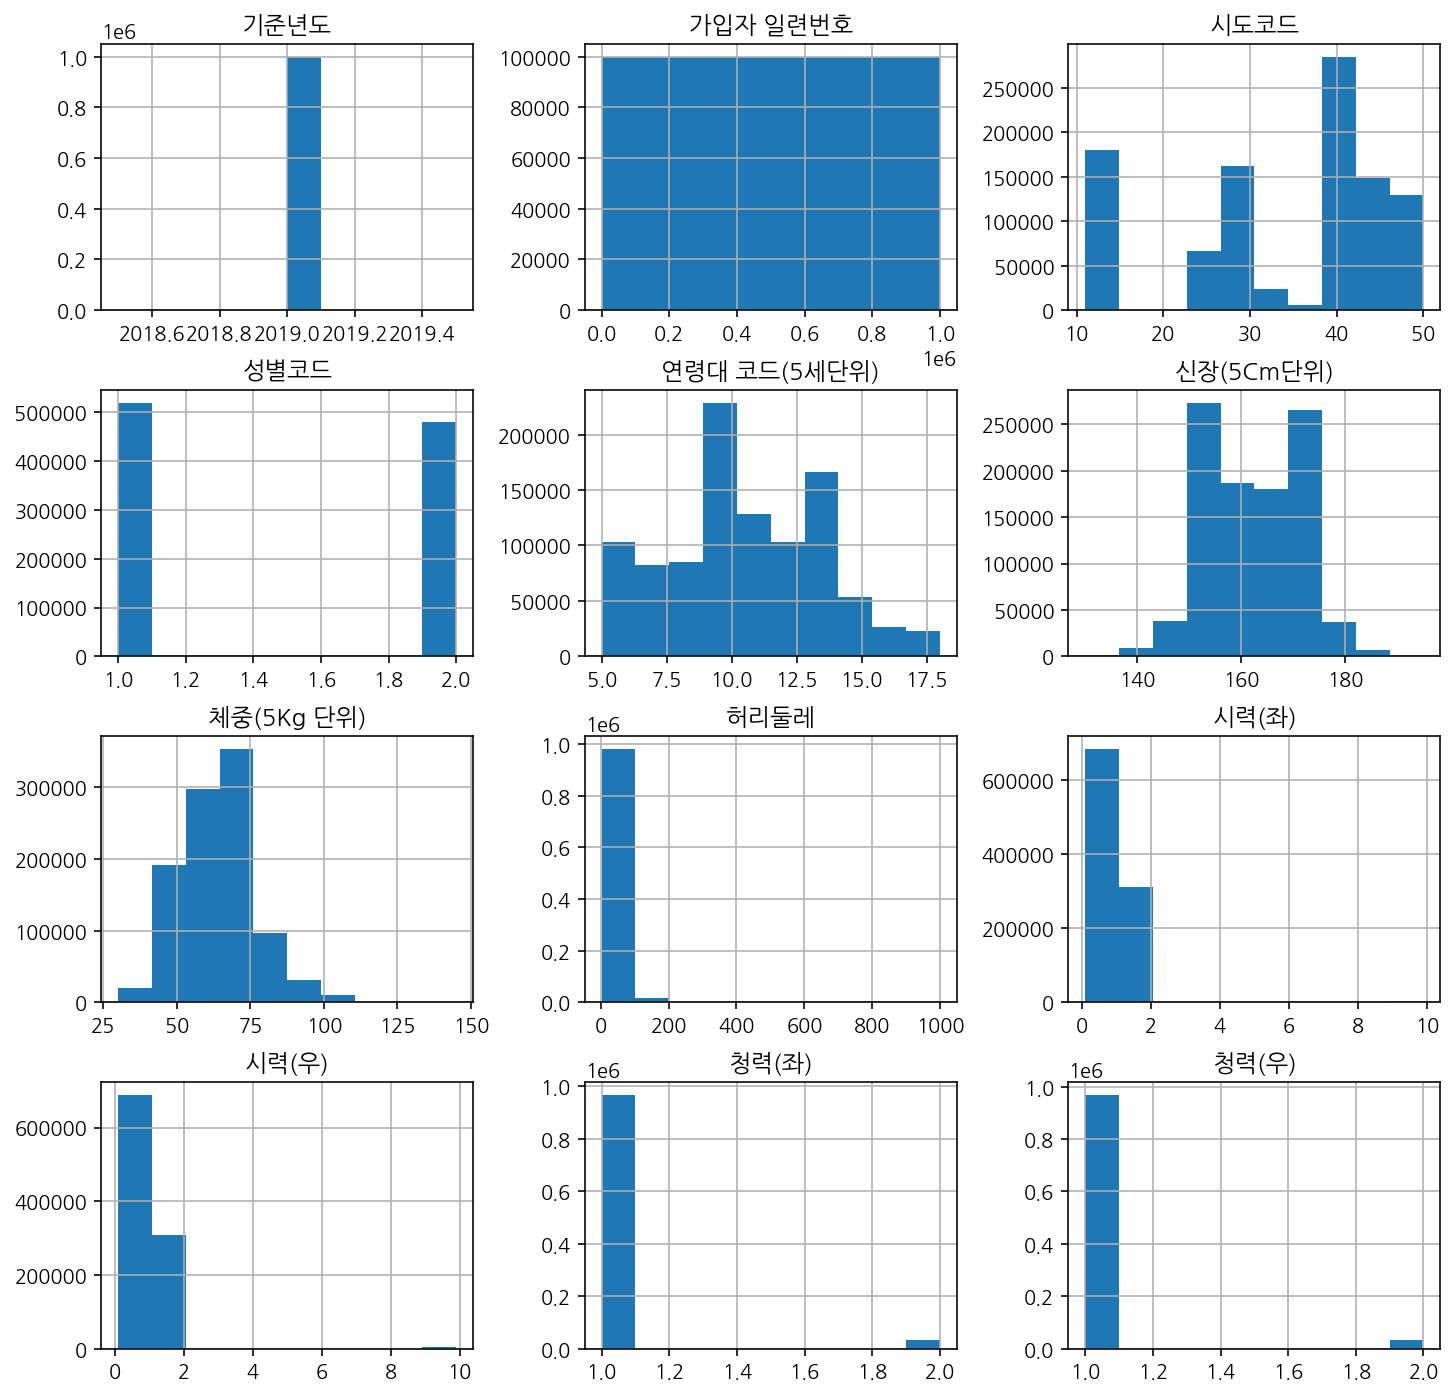

In [49]:
# 슬라이싱을 사용해 앞에서 12개 컬럼에 대한 데이터로 히스토그램 그리기
# [행,열]
h = df.iloc[:,:12].hist(figsize = (12,12))

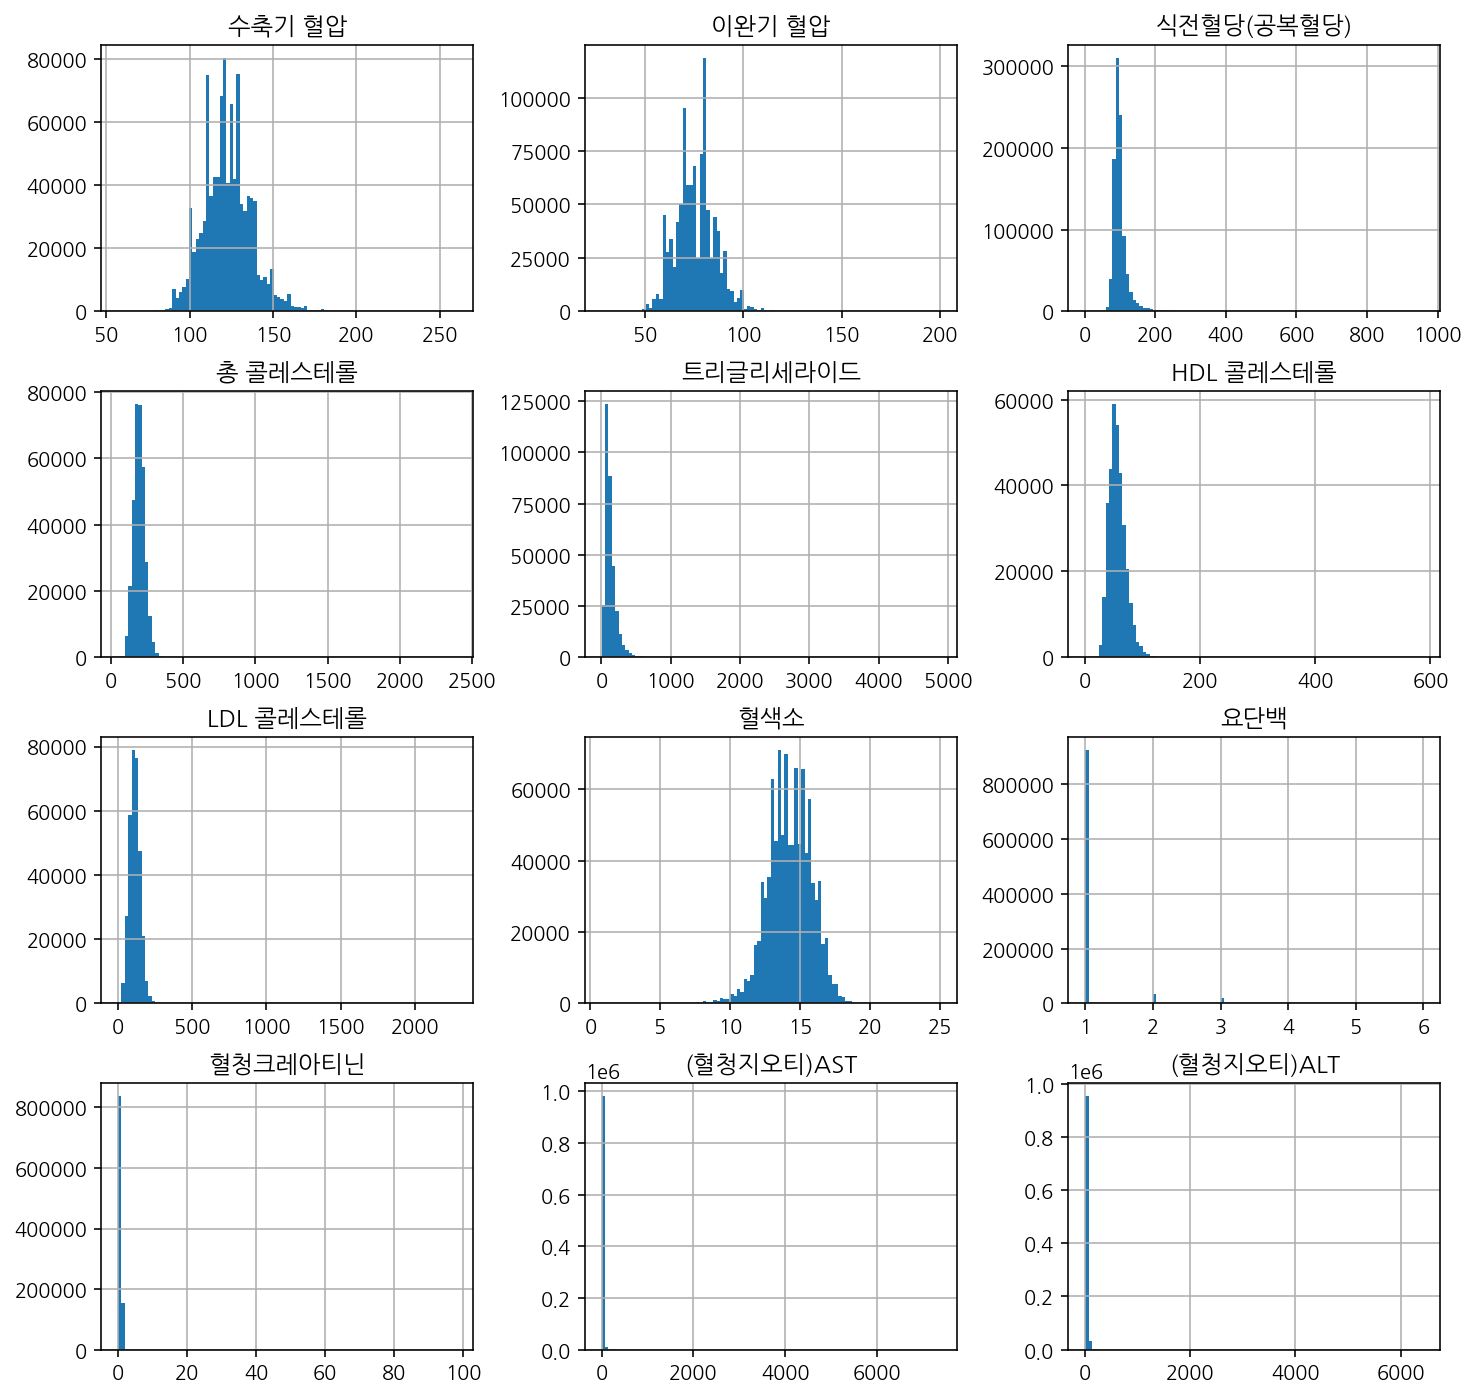

In [52]:
# 슬라이싱을 사용해 앞에서 12번째부터 23번째까지 (12:24) 컬럼에 대한 데이터로 히스토그램 그리기
h = df.iloc[:,12:24].hist(figsize = (12,12), bins = 100)

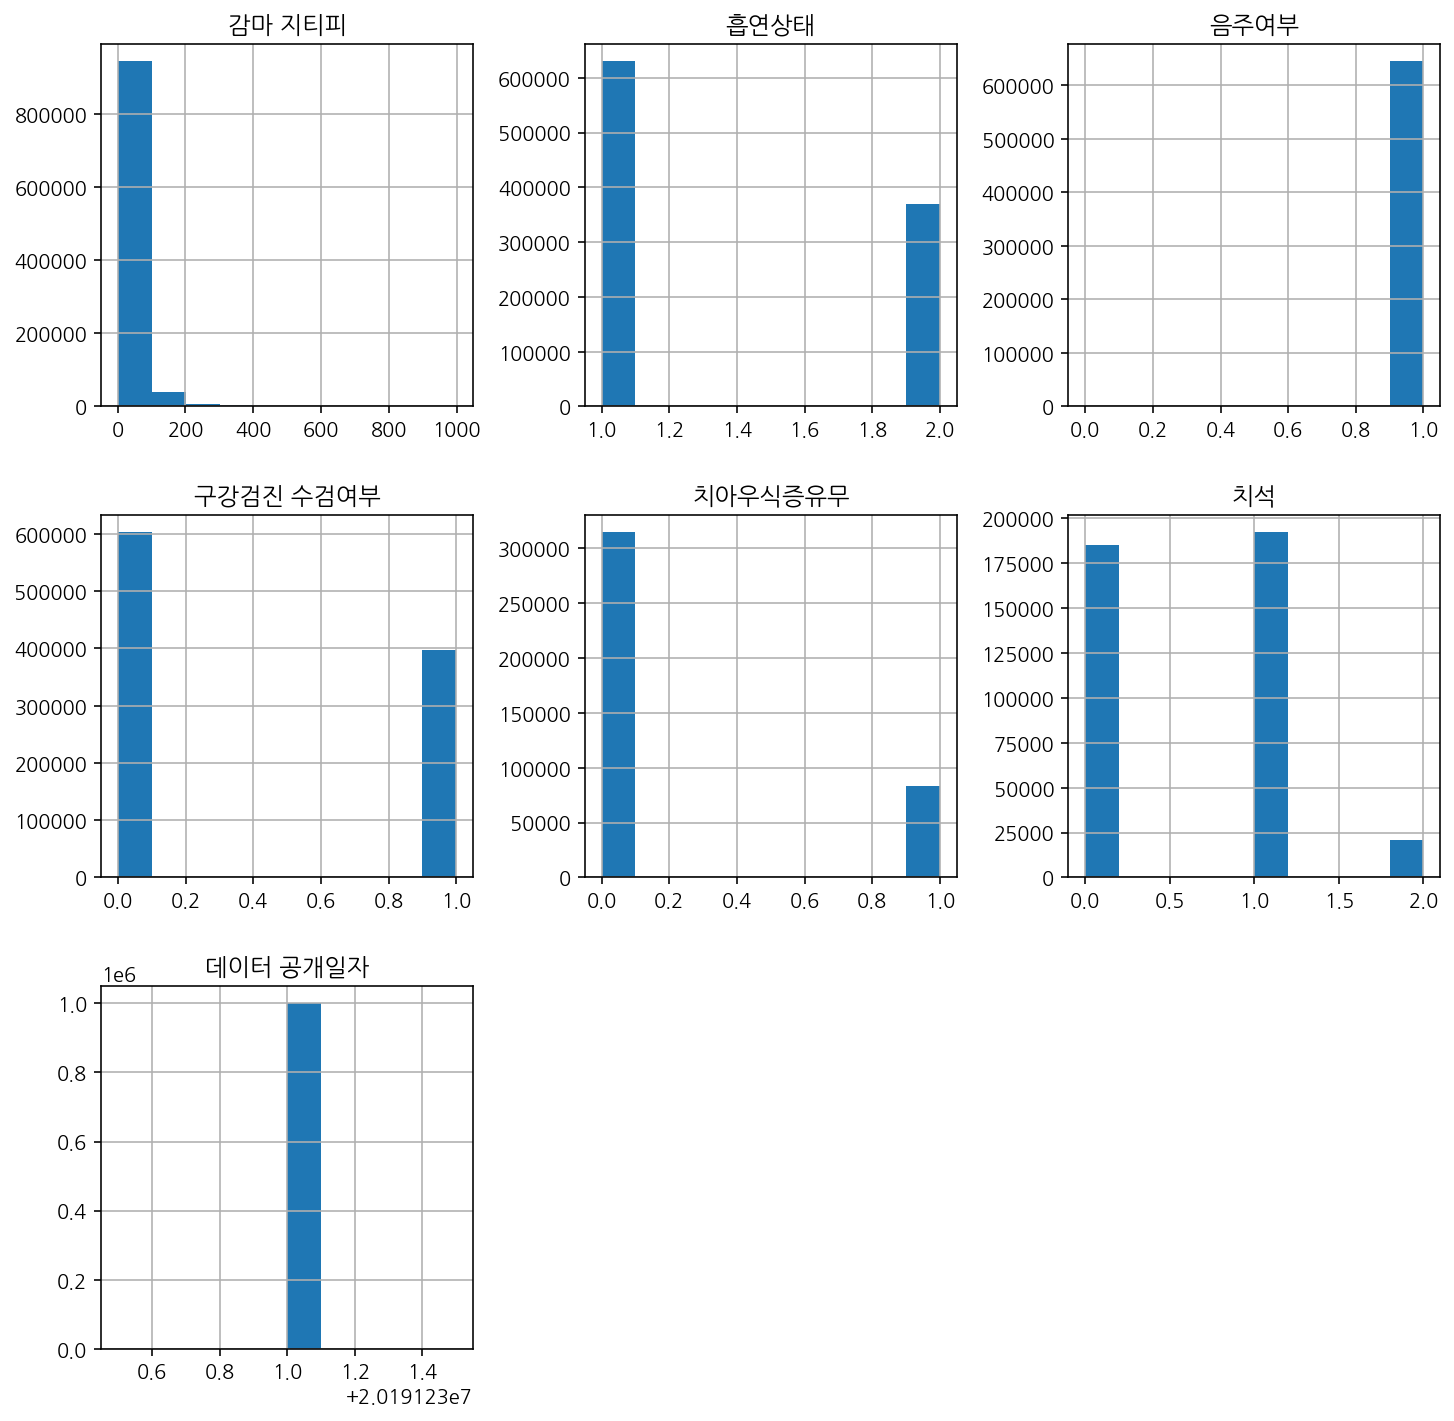

In [54]:
# 슬라이싱을 사용해 앞에서 24번째부터 마지막까지(24:) 컬럼에 대한 데이터로 히스토그램 그리기.
h = df.iloc[:,24:].hist(figsize = (12,12), bins = 10)

# 샘플데이터 추출하기
* seaborn의 그래프는 내부에서 수학적 연산이 되기때문에 데이터가 많으면 속도가 오래걸림.
* 따라서 전체 데이터를 사용하면 너무 느리기때문에 일부만 샘플링해서 사용.

In [57]:
# df.sample을 통해 일부 데이터만 샘플데이터를 추출.
# random_state를 사용해 샘플링 값 고정 가능.
# 실험 통제를 위해 random_state를 고정하기도 함.
# 여기에서는 1을 사용. 이 값은 높든 낮든 상관없이 값을 고정시키는 역할만 수행.
df_sample = df.sample(1000, random_state= 1)
df_sample.shape

(1000, 34)

# 데이터 시각화 도구 Seaborn 사용
* https://seaborn.pydata.org/
* seaborn은 https://matplotlib.org/ 을 사용하기 쉽게 만들어 졌으며 간단하게 고급통계연산 가능하게 함.

# 범주형(카테고리)데이터 시각화
* countplot은 범주형 데이터의 수를 더한 값을 그래프로 표현.
* value_counts로 구한 값을 시각화

### countplot - 흡연상태

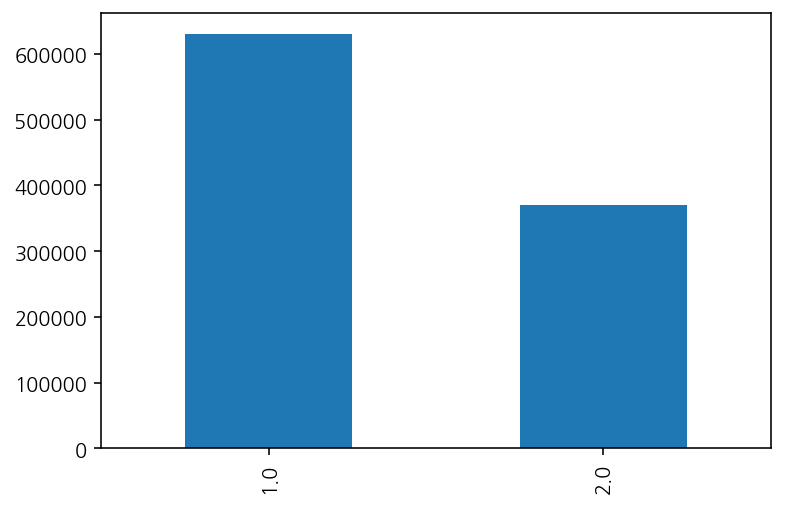

In [58]:
# 흡연상태에 따른 countplot을 그린다.
df["흡연상태"].value_counts().plot.bar()

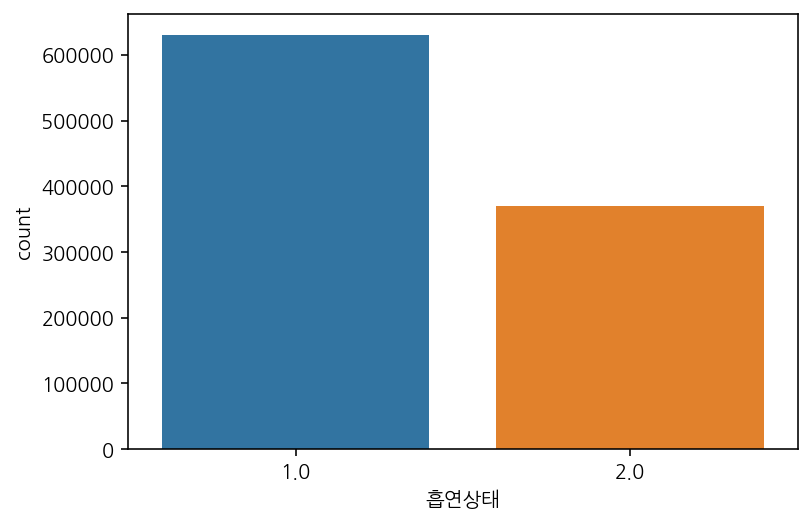

In [60]:
sns.countplot(x = "흡연상태", data = df)

### hue 옵션 사용

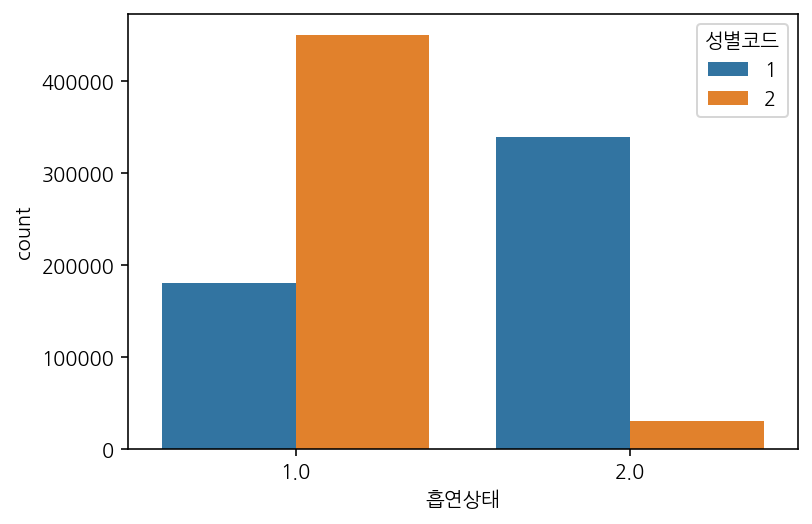

In [62]:
# 흡연상태에 따른 countplot을 그리고 hue를 사용해 성별코드로 색상을 구분해 그리기.
# 여기에서 hue는 포토샵에 있는 hue는 포토샵에 있는 hue메뉴 떠올리면 됨. 색상을 의미.
# 또, seaborn에서 제공하는 폰트설정을 사용 가능.
# 다만, 이 때 seaborn의 기본 스타일이 적용되는 것을 확인해 주시는 것이 좋습니다.
# Mac
# sns.set(font_scale = 1.5, font = "AppleGothic")
# Window
# sns.set(font_scale = 1.5, font = "Malgun Gothic")
sns.countplot(data = df, x = "흡연상태", hue = "성별코드")

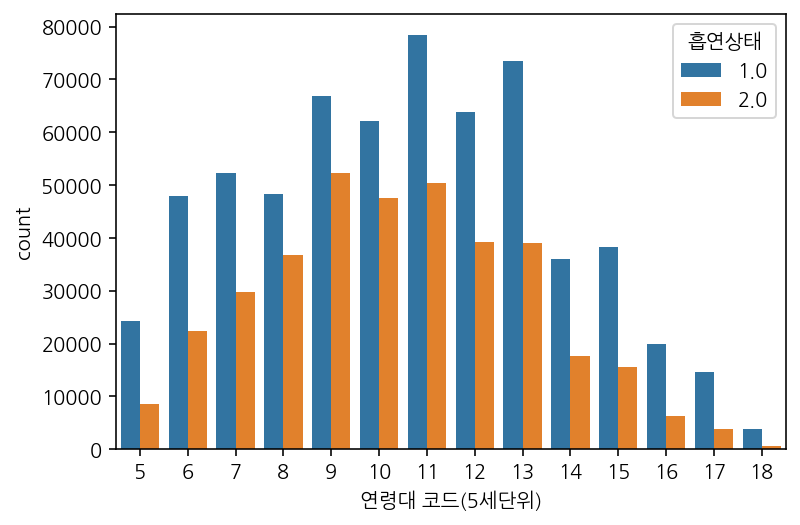

In [65]:
# countplot으로 연령대별 흡연상태 확인
# hue를 사용해 서로 다른 색상으로 표현
sns.countplot(data = df, x = "연령대 코드(5세단위)", hue = "흡연상태")

### countplot - 키와 몸무게
* 키와 몸무게는 연속형 데이터로 볼 수 있다.
* 하지만 이 데이터는 키 5Cm, 체중 5kg 단위로 구성.
* 이렇게 특정범위로 묶게 되면 연속형 데이터라기 보다 범주형 데이터로 볼 수 있다.

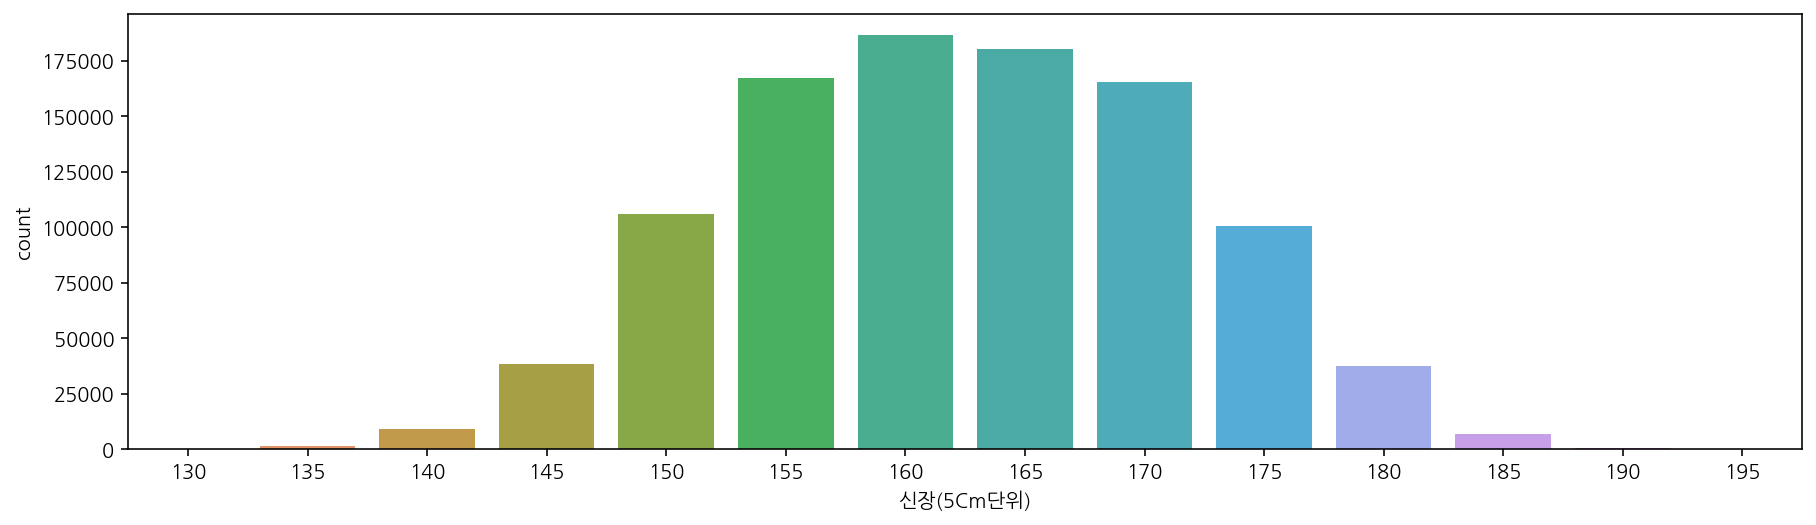

In [69]:
# countplot으로 키 확인
plt.figure(figsize=(15,4))
sns.countplot(data = df, x = "신장(5Cm단위)")

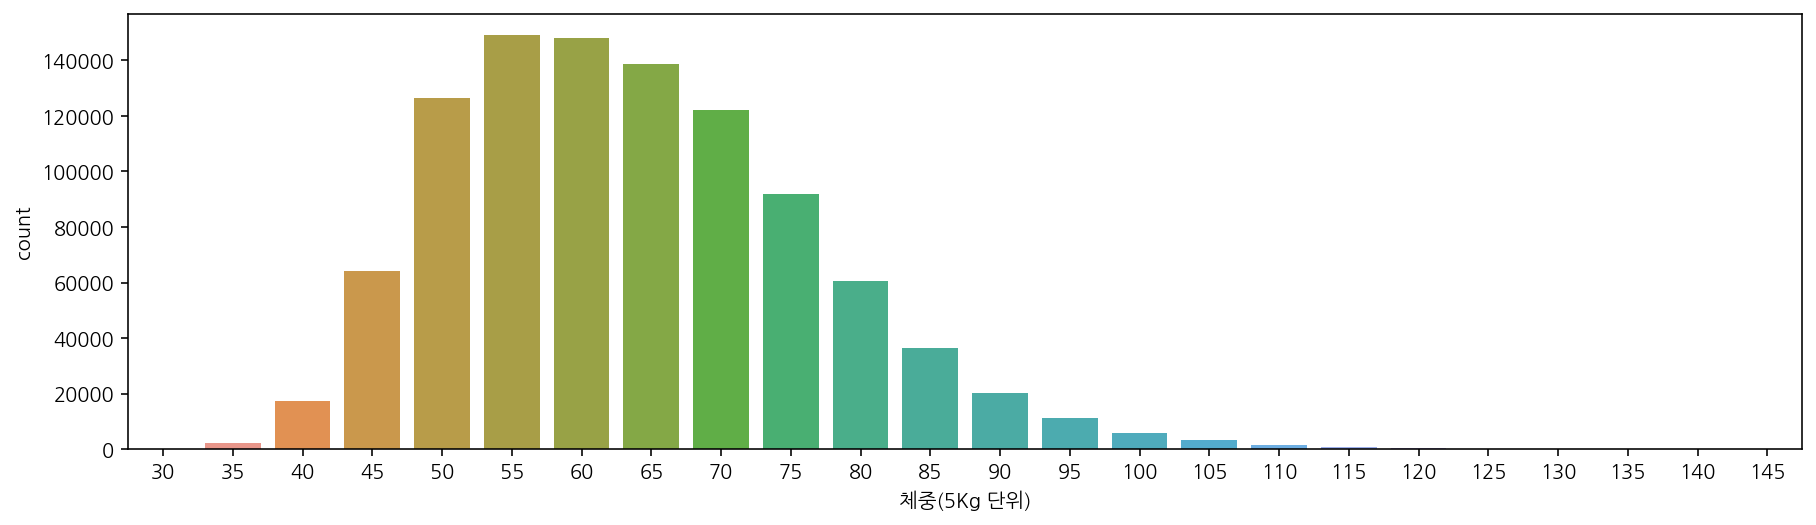

In [70]:
# countplot으로 체중 확인
plt.figure(figsize=(15,4))
sns.countplot(data = df, x = "체중(5Kg 단위)")

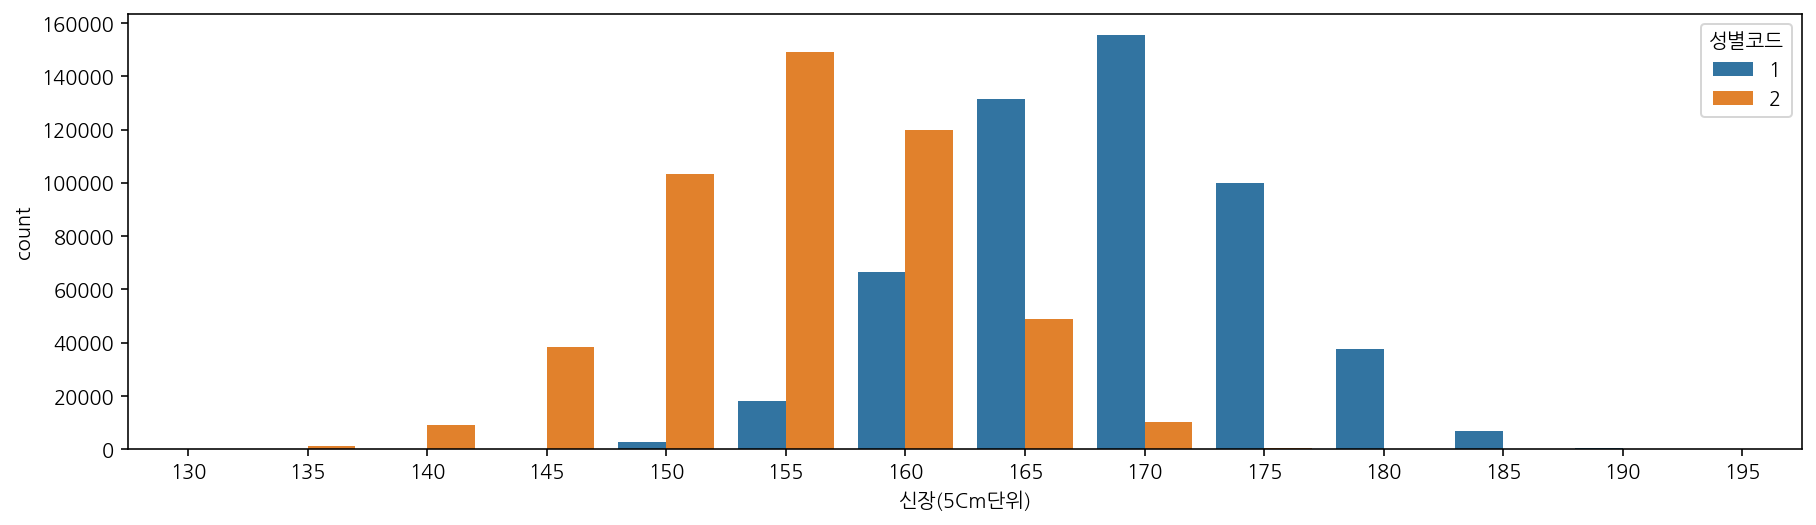

In [71]:
# countplot으로 신장(5Cm단위) 확인
# 성별에 따른 키의 차이 확인
plt.figure(figsize=(15,4))
sns.countplot(data = df, x = "신장(5Cm단위)", hue = "성별코드")

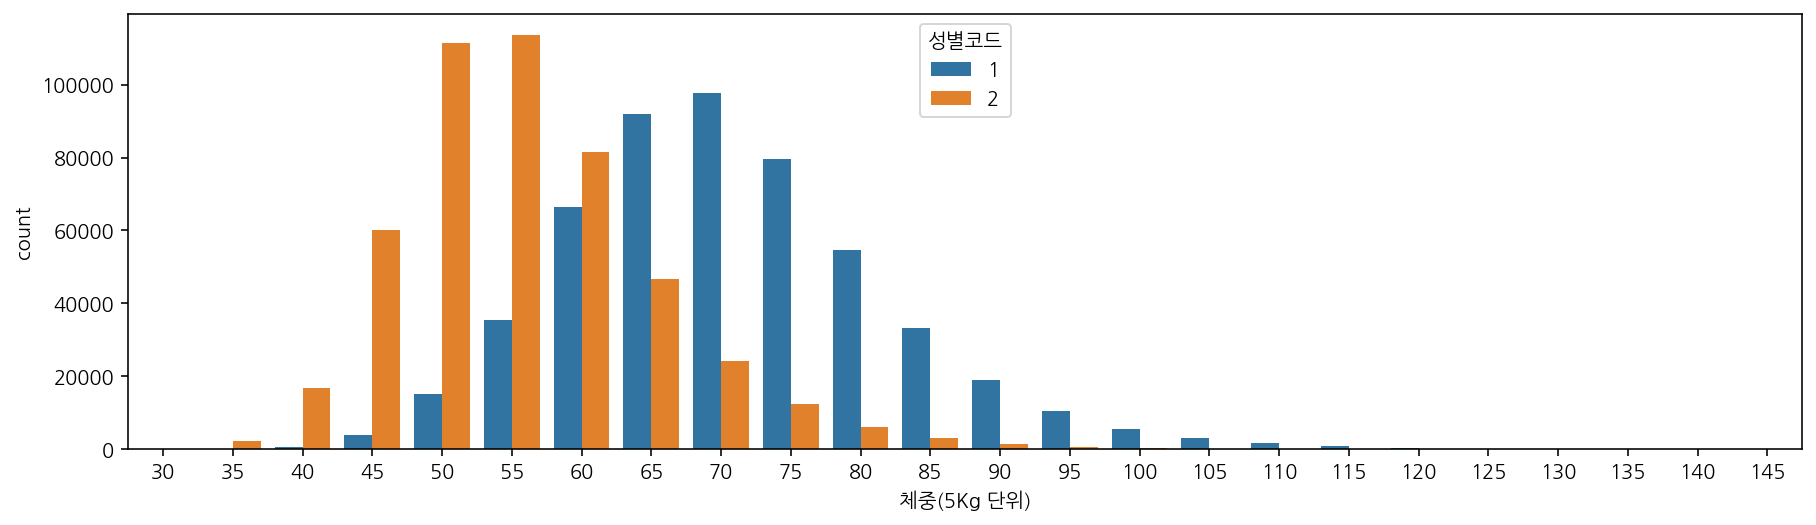

In [72]:
# 성별에 따른 체중의 차이 확인
plt.figure(figsize=(15,4))
sns.countplot(data = df, x = "체중(5Kg 단위)", hue = "성별코드")

### barplot - 수치형 vs 범주형 데이터 시각화

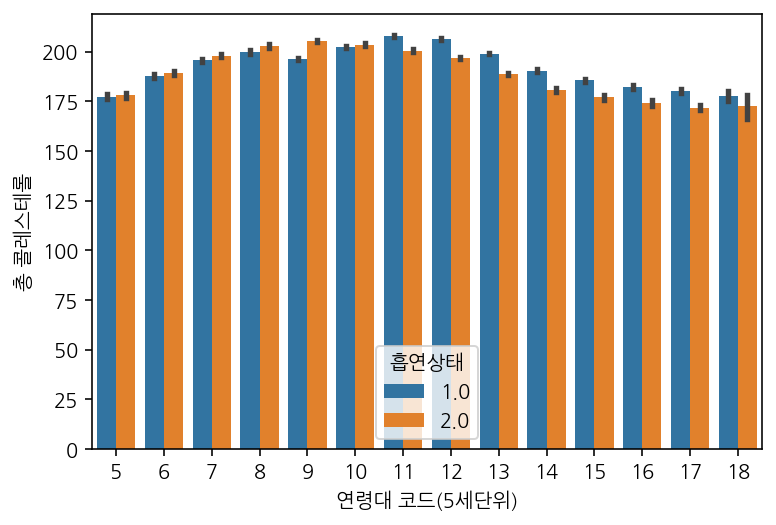

In [78]:
# 연령대 코드와 총 콜레스테롤 확인
# hue로 색상을 다르게 표현 가능. 흡연상태를 함께 확인.
sns.barplot(data = df, x = "연령대 코드(5세단위)", y = "총 콜레스테롤", hue = "흡연상태")

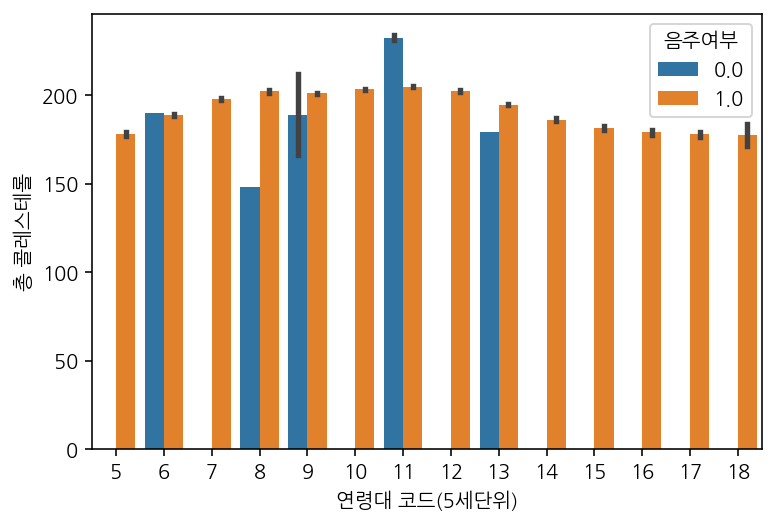

In [79]:
# 연령대 코드와 총 콜레스테롤 확인
# 콜레스테롤과 연령대 코드(5세단위)를 음주여부에 따라 barplot으로 그리기
# 음주여부 부분이 결측치가 많음..
sns.barplot(data = df, x = "연령대 코드(5세단위)", y = "총 콜레스테롤", hue = "음주여부")

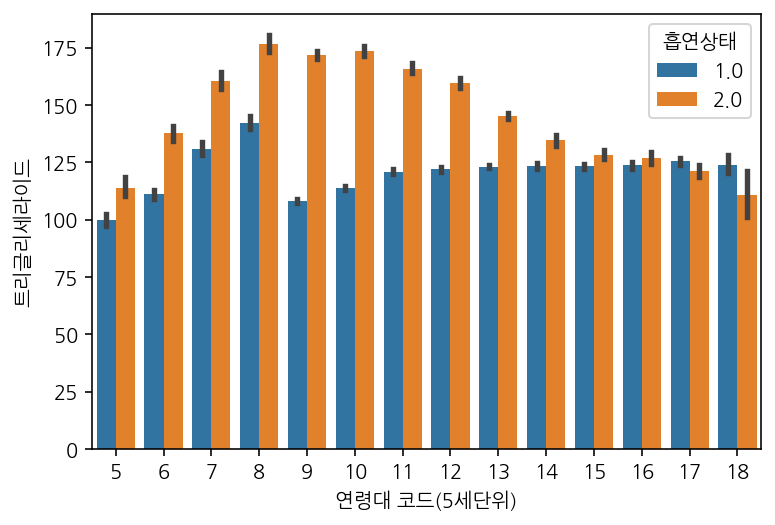

In [83]:
# 트리글리세라드(중성지방)에 따른 연령대 코드(5세단위)를 흡연상태에 따라 barplot으로 그리기
# 검정색 막대는 신뢰구간을 의미
sns.barplot(data = df, x = "연령대 코드(5세단위)", y = "트리글리세라이드", hue = "흡연상태")

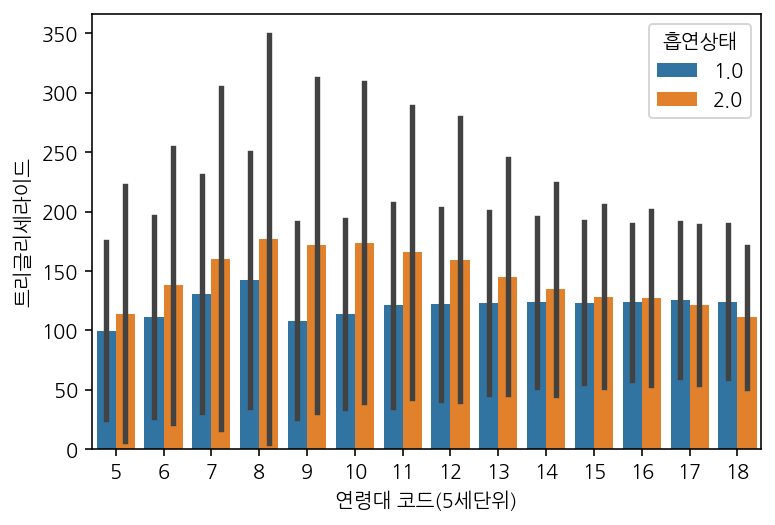

In [82]:
# 표준편차로 그려보기 : ci = "sd"
sns.barplot(data = df, x = "연령대 코드(5세단위)", y = "트리글리세라이드", hue = "흡연상태", ci = "sd")

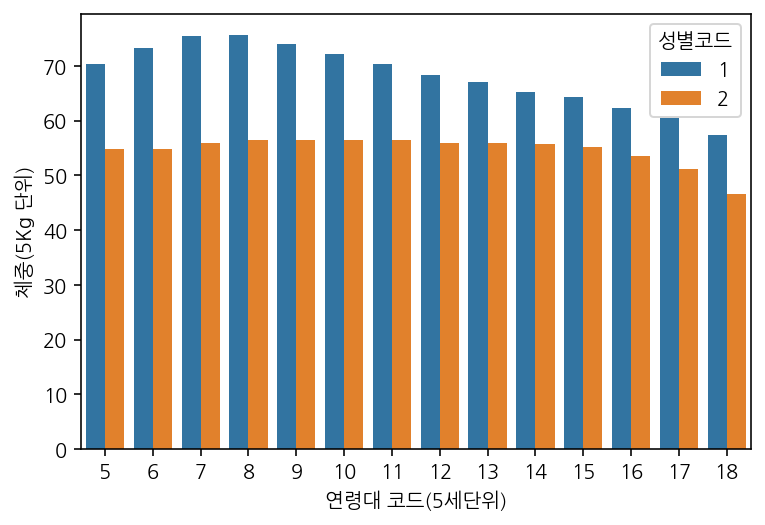

In [88]:
# 흡연상태에 따른 체중(5Kg 단위)을 성별에 따라 확인
# 신뢰구간 표시 없애기 : ci = None
sns.barplot(data = df, x = "연령대 코드(5세단위)", y = "체중(5Kg 단위)", hue = "성별코드", ci = None)

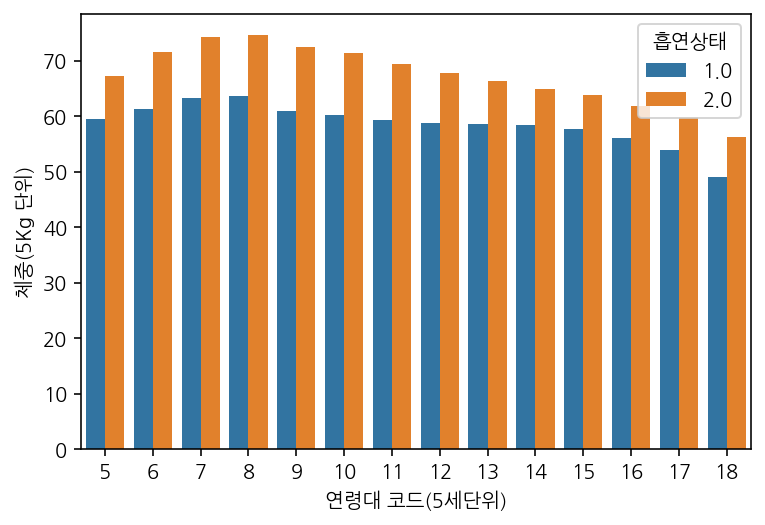

In [89]:
# 연령대 코드(5세단위)에 따른 체중(5Kg 단위)을 흡연상태에 따라 barplot으로 그리기.
sns.barplot(data = df, x = "연령대 코드(5세단위)", y = "체중(5Kg 단위)", hue = "흡연상태", ci = None)

### lineplot and pointplot

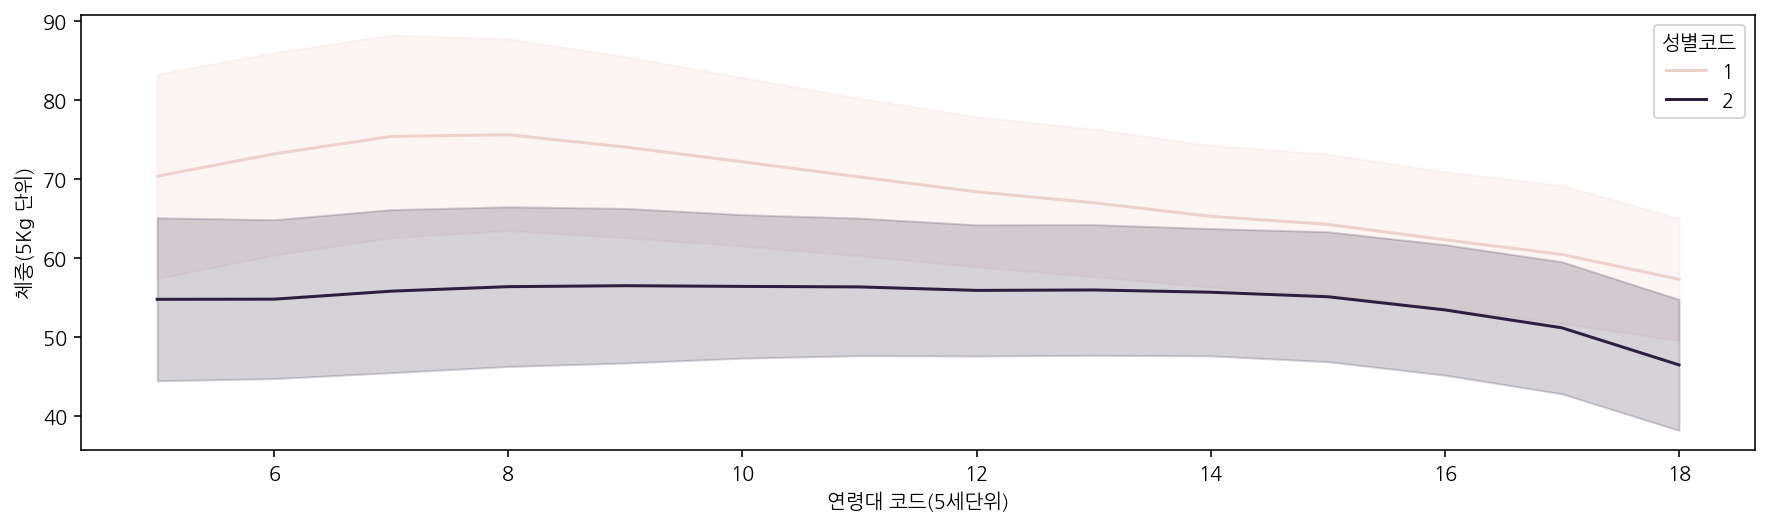

In [97]:
# 연령대 코드(5세단위)에 따른 체중(5Kg 단위)을 성별코드에 따라 linplot으로 그리기
plt.figure(figsize=(15,4))
sns.lineplot(data = df, x = "연령대 코드(5세단위)", y = "체중(5Kg 단위)", hue = "성별코드", ci = "sd")

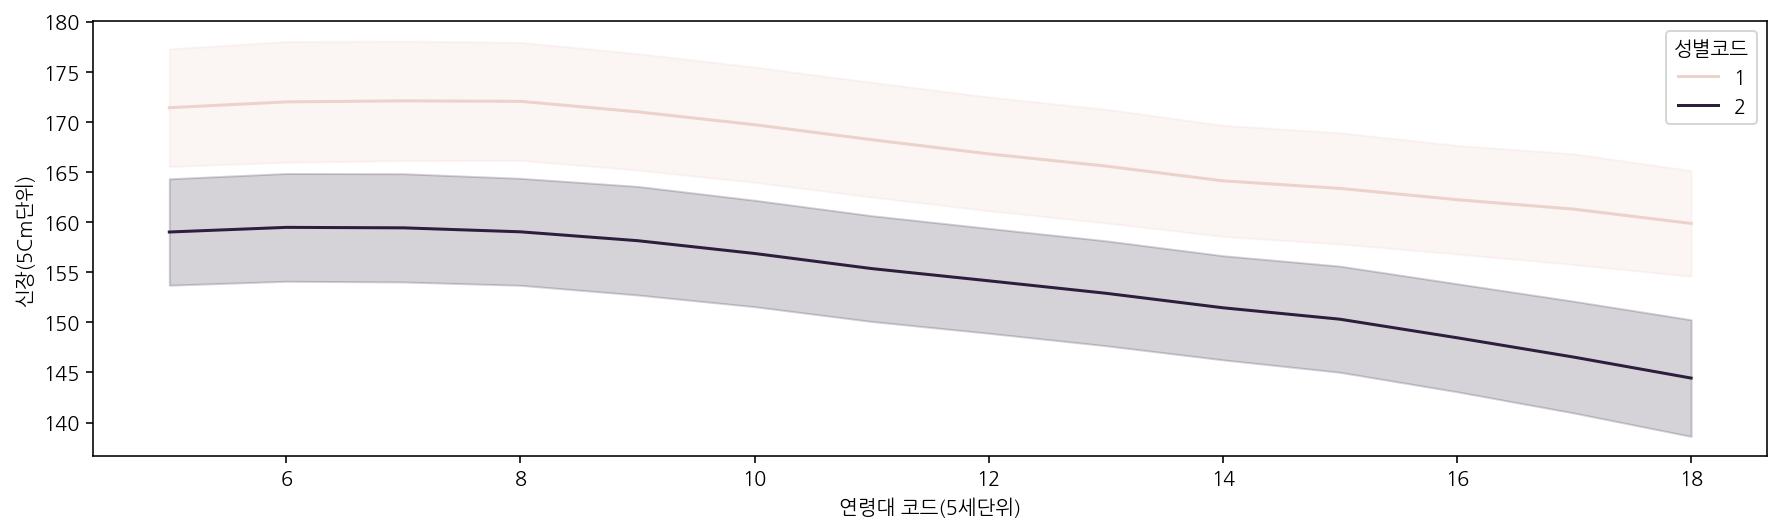

In [96]:
# 연령대 코드(5세단위)에 따른 신장(5Cm 단위)을 성별코드에 따라 linplot으로 그리기
plt.figure(figsize=(15,4))
sns.lineplot(data = df, x = "연령대 코드(5세단위)", y = "신장(5Cm단위)", hue = "성별코드", ci = "sd")

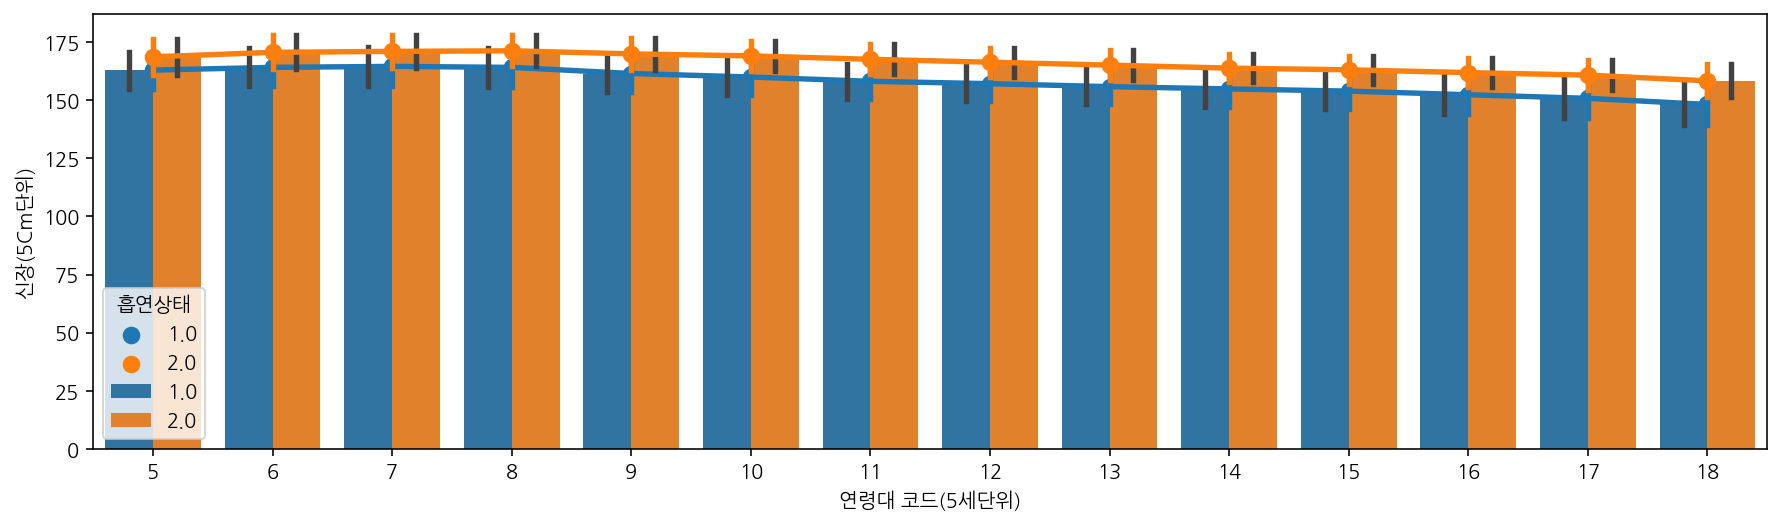

In [100]:
# 연령대 코드(5세단위)에 따른 체중(5Kg 단위)을 흡연상태에 따라 pointplot과 barplot으로 그리기
plt.figure(figsize=(15,4))
sns.barplot(data = df, x = "연령대 코드(5세단위)", y = "신장(5Cm단위)", hue = "흡연상태", ci = "sd")
sns.pointplot(data = df, x = "연령대 코드(5세단위)", y = "신장(5Cm단위)", hue = "흡연상태", ci = "sd")

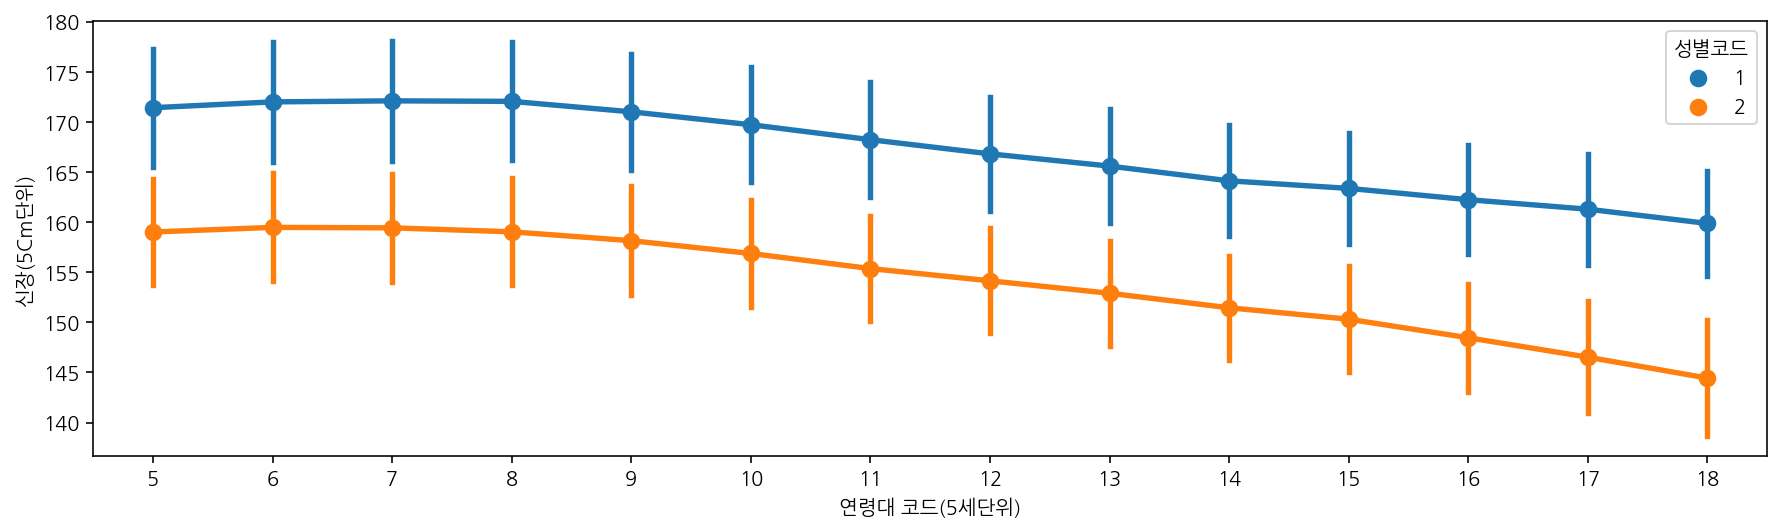

In [101]:
# 연령대 코드(5세단위)에 따른 신장(5Cm 단위)을 성별코드에 따라 pointplot으로 그리기
plt.figure(figsize=(15,4))
sns.pointplot(data = df, x = "연령대 코드(5세단위)", y = "신장(5Cm단위)", hue = "성별코드", ci = "sd")

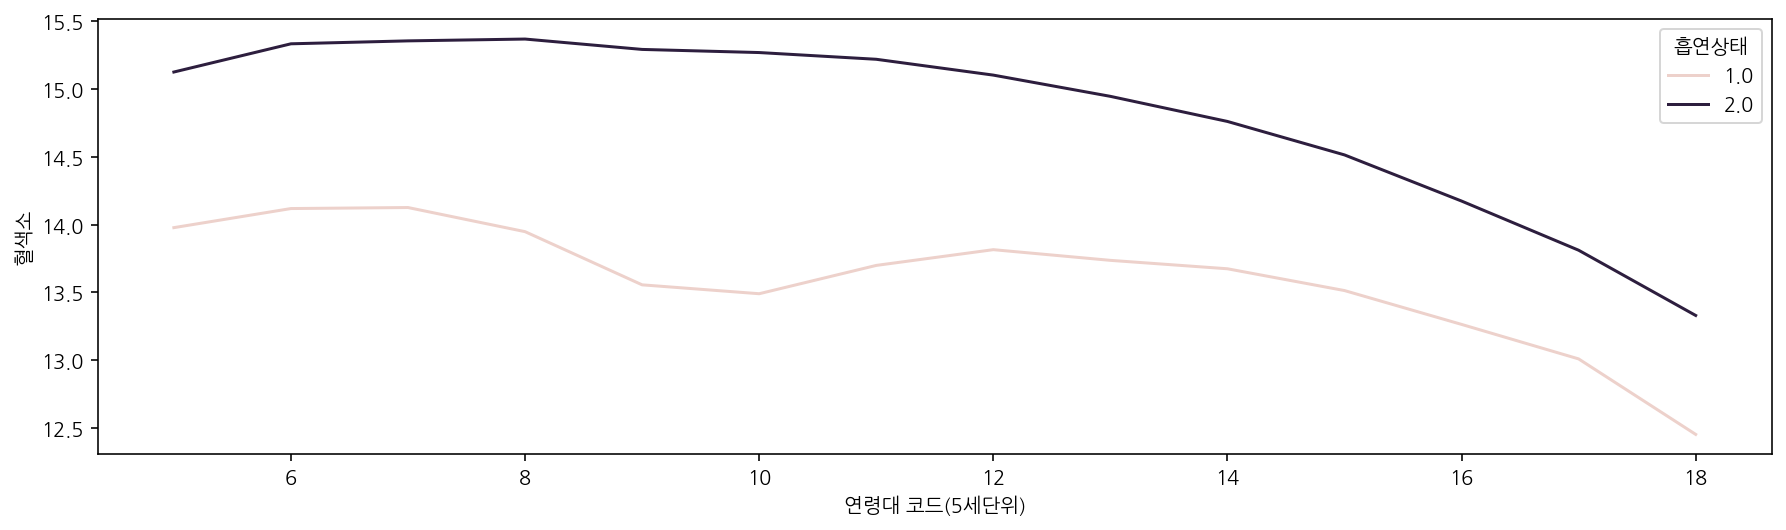

In [103]:
# 연령대 코드(5세단위)에 따른 혈색소를 흡연상태에 따라 lineplot으로 그리기
plt.figure(figsize=(15,4))
sns.lineplot(data = df, x = "연령대 코드(5세단위)", y = "혈색소", hue = "흡연상태", ci = None)

### boxplot
* https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html
* https://pandas.pydata.org/pandas-docs/stabel/reference/api/pandas.DataFrame.boxplot.html
* 가공하지 않은 자료 그대로 이용해 그린 것이 아닌, 자료부터 얻어낸 통계량인 5가지 요약 수치로 그림.
* 5가지 요약수치란 기술통계학에서 자료의 정보를 알려주는 아래의 다섯가지 수치 의미.
    1. 최솟값
    2. 제 1사분위수
    3. 제 2사분위수 (즉, 중앙값)
    4. 제 3사분위수
    5. 최댓값

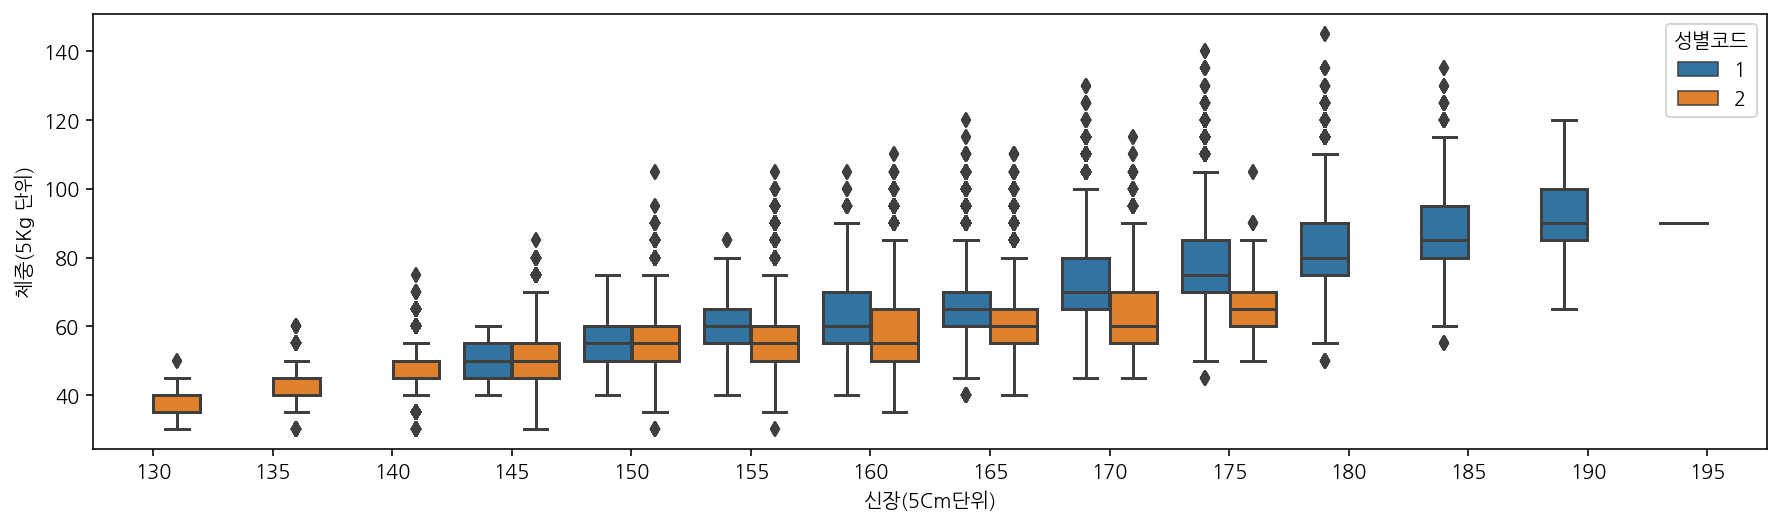

In [109]:
# boxplot으로 신장(5Cm단위)에 따른 체중 (5Kg단위)을 그리며, 성별코드에 따라 다른 색상으로 표현.
plt.figure(figsize=(15,4))
sns.boxplot(data = df, x = "신장(5Cm단위)", y = "체중(5Kg 단위)", hue = "성별코드")

### violinplot

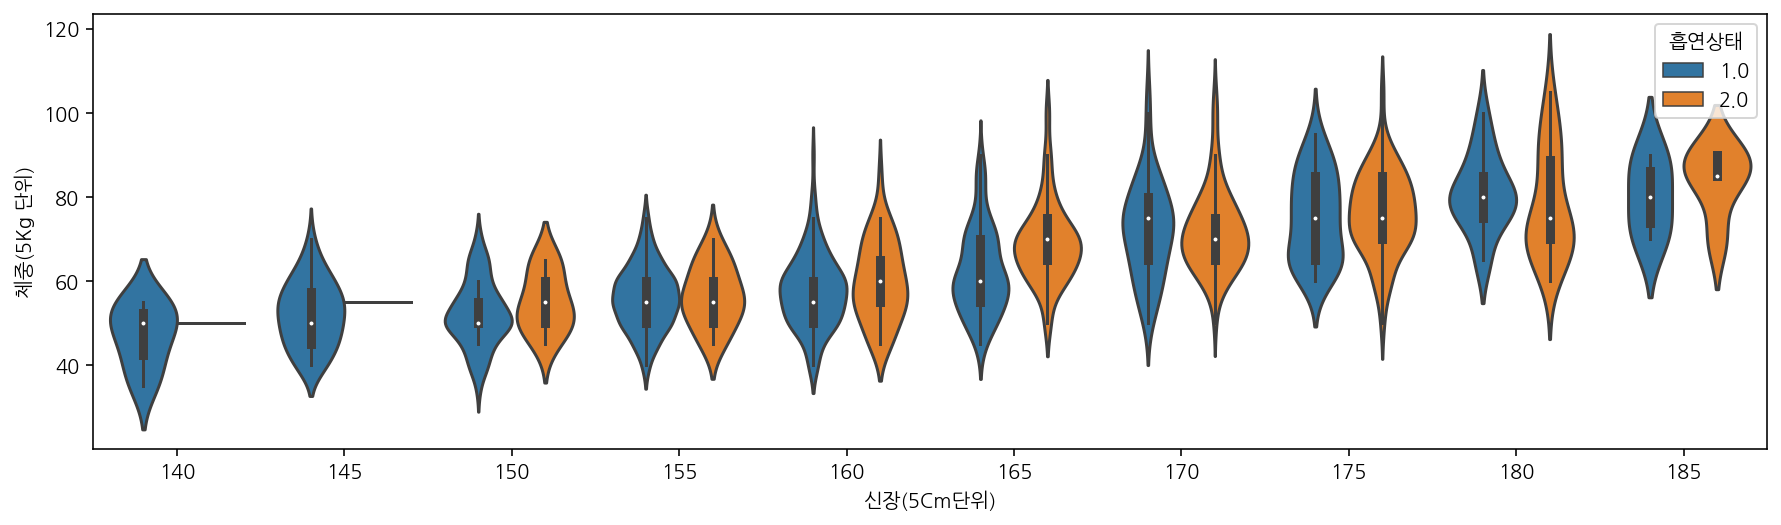

In [112]:
# violinplot 신장(5Cm단위)에 따른 체중 (5Kg단위)을 그리며, 흡연상태에 따라 다른 색상으로 표현.
plt.figure(figsize=(15,4))
sns.violinplot(data = df_sample, x = "신장(5Cm단위)", y = "체중(5Kg 단위)", hue = "흡연상태")

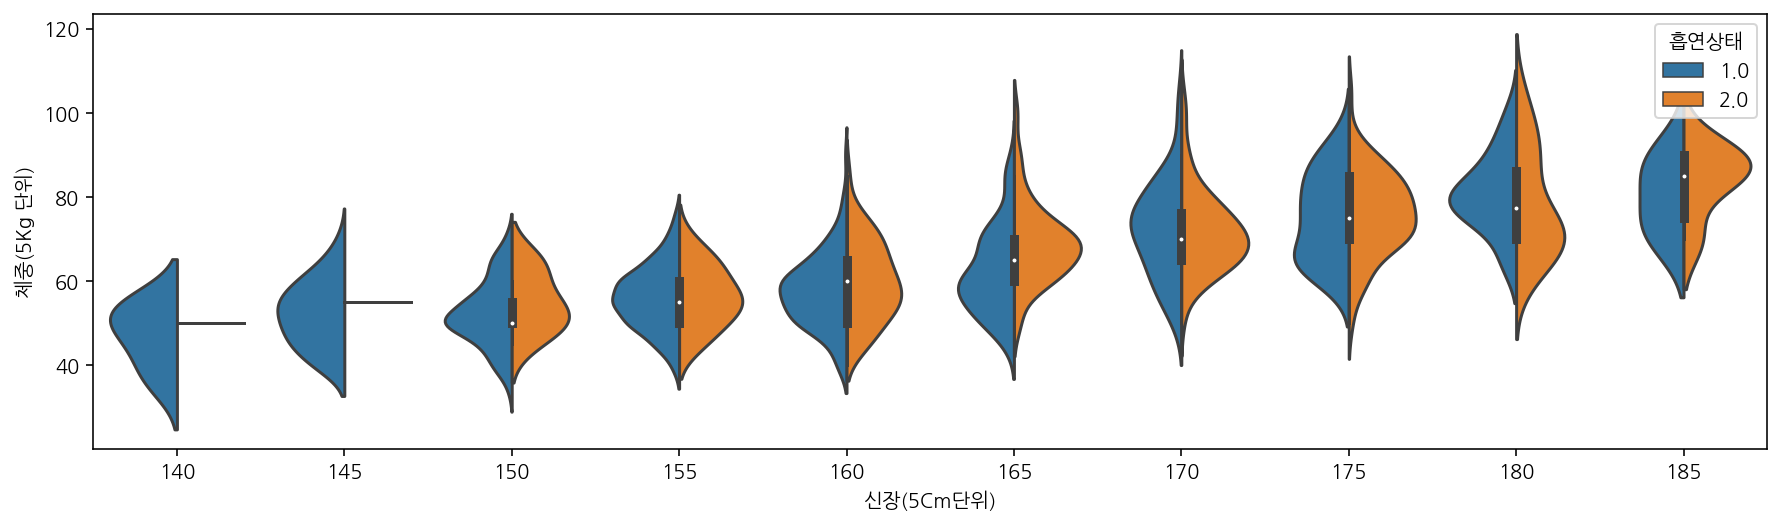

In [113]:
# violinplot 의 solit 기능 사용
plt.figure(figsize=(15,4))
sns.violinplot(data = df_sample, x = "신장(5Cm단위)", y = "체중(5Kg 단위)", hue = "흡연상태", split=True)

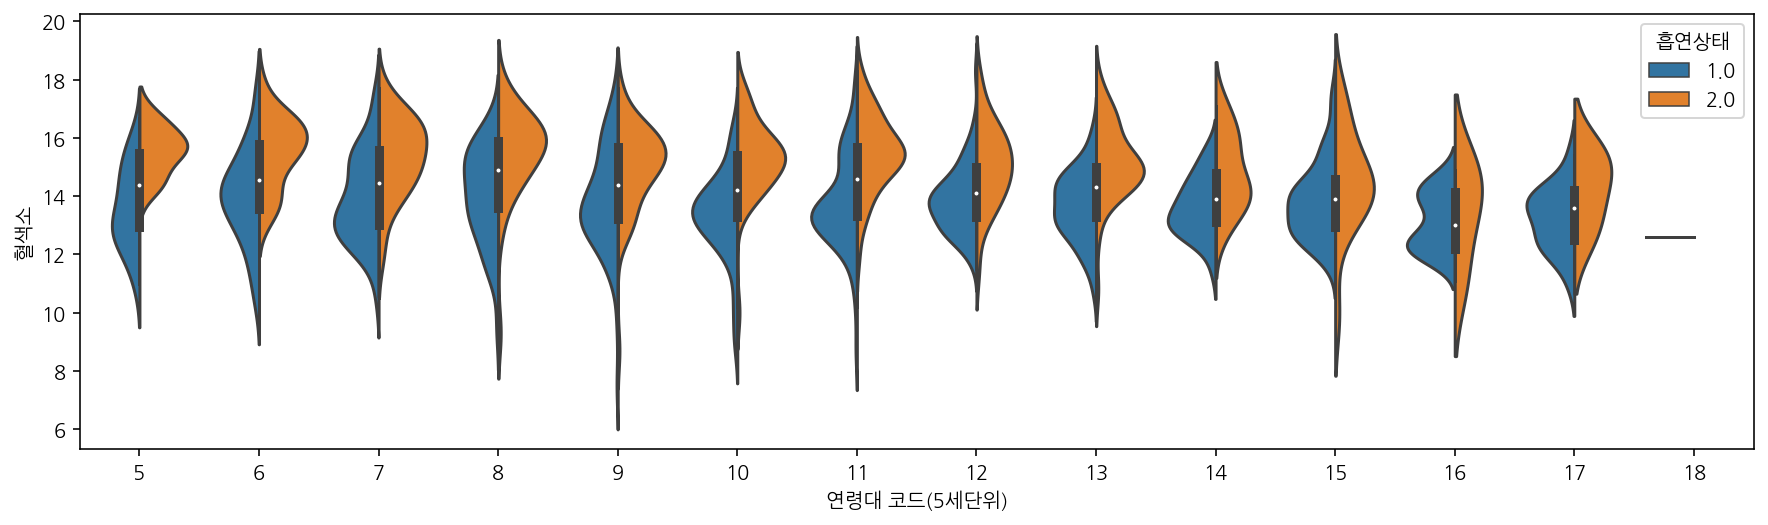

In [116]:
# violinplot 연령대 코드(5세단위)에 따른 혈색소를 그리며, 흡연상태에 따라 다른 색상으로 표현.
plt.figure(figsize=(15,4))
sns.violinplot(data = df_sample, x = "연령대 코드(5세단위)", y = "혈색소", hue = "흡연상태", split = True)

### swarm plot

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 34.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 50.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 48.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 43.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 40.9% of the points cannot be placed; y

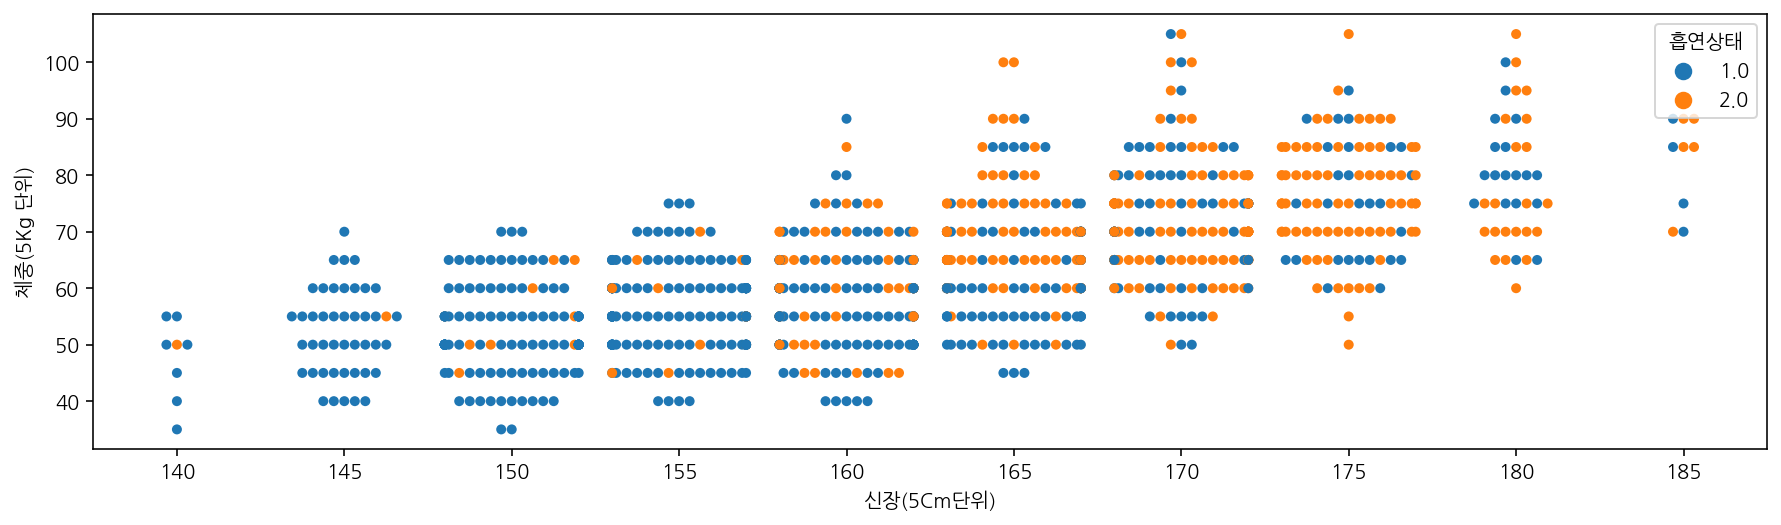

In [118]:
# swarmplot으로 신장(5Cm단위)에 따른 체중(5Kg단위)을 그리며 흡연상태에 따라 다른 색상으로 표현
# 점을 하나씩 찍기 때문에 오래 걸리는 코드는 전체로 그려보기 전에 일부만 가져와 그려보기.
plt.figure(figsize=(15,4))
sns.swarmplot(data = df_sample, x = "신장(5Cm단위)", y = "체중(5Kg 단위)", hue = "흡연상태")

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 7.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 10.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 9.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 7.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


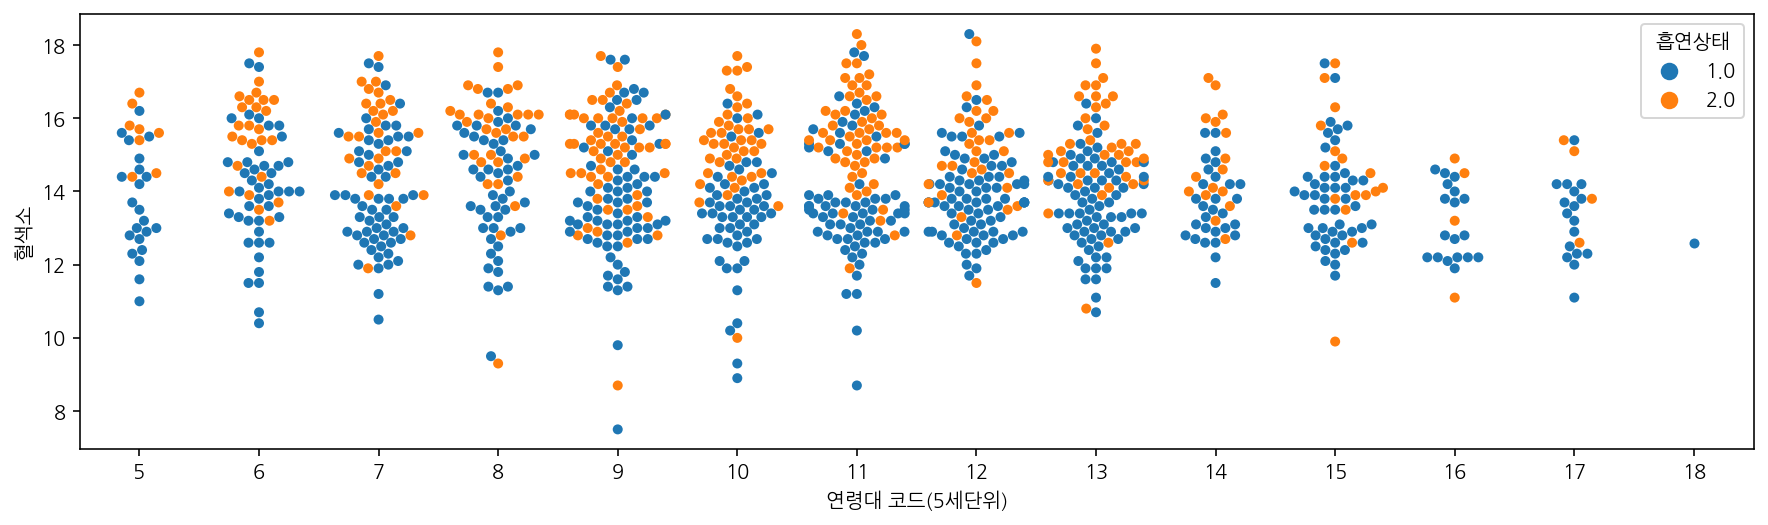

In [122]:
# swarmplot으로 연령대 코드(5세단위)에 따른 혈색소를 그리며, 흡연상태에 따라 다른 색상으로 표현.
plt.figure(figsize=(15,4))
sns.swarmplot(data = df_sample, x = "연령대 코드(5세단위)", y = "혈색소", hue = "흡연상태")

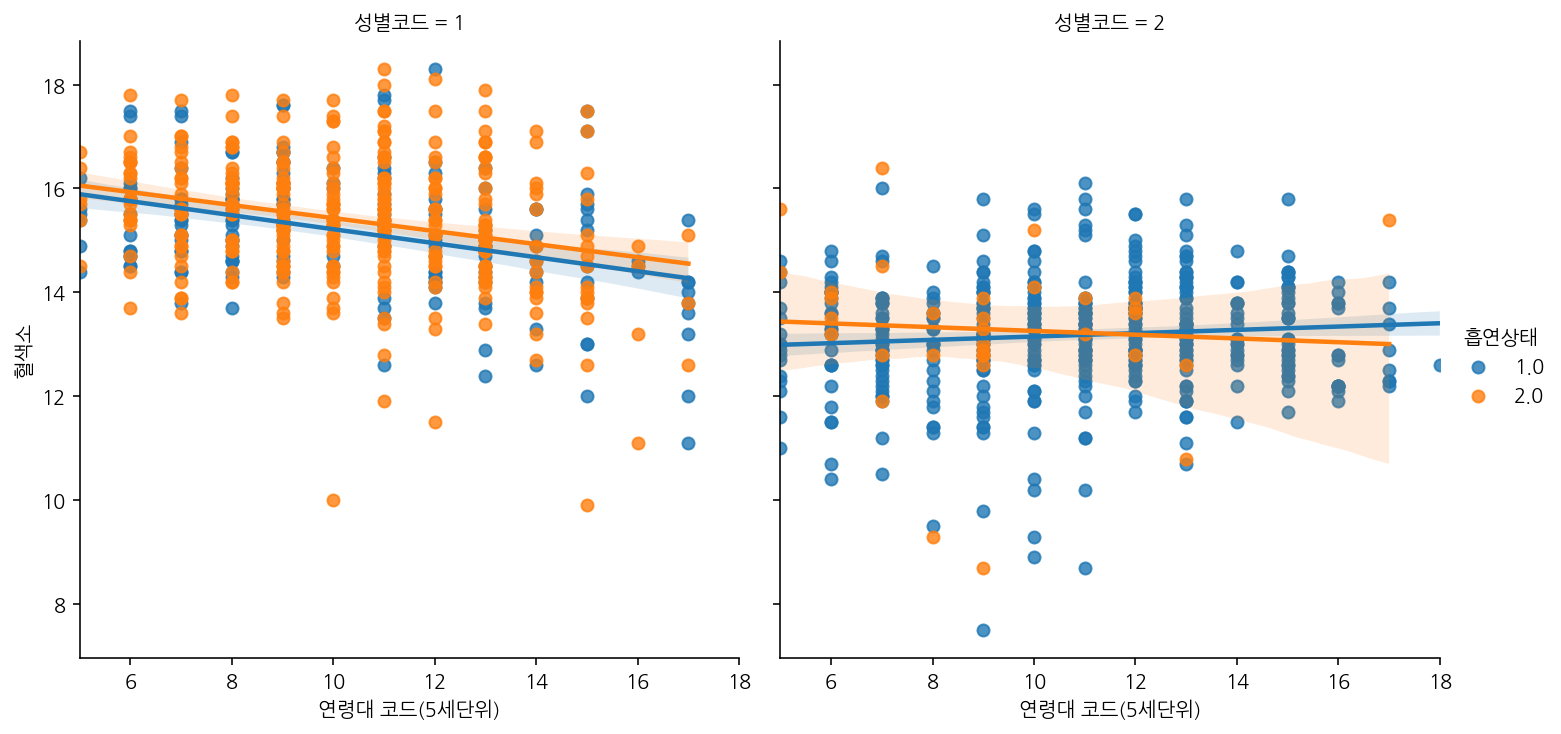

In [124]:
# lmplot으로 그리기
sns.lmplot(data = df_sample, x = "연령대 코드(5세단위)", y = "혈색소", hue = "흡연상태", col = "성별코드")

# 수치형 데이터 시각화

### ㅇㅇㅇ